### Final annotation of Epithelial cells from large intestine (second trimester/preterm)


Preprocessing:
- epithelial cells from main object subsetted, then subsetted cells from large intesine, and further subsetted only cells from second trimester/preterm patients
- performed scvi batch correction to prepare objects

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sc.logging.print_header()

scanpy==1.8.0 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.3.5 scikit-learn==0.24.1 statsmodels==0.13.5 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


In [3]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/post_scvi20221124/LI_ST_epi.hvg5000_noRPL.scvi_output.with_annotv2.22021124.h5ad')

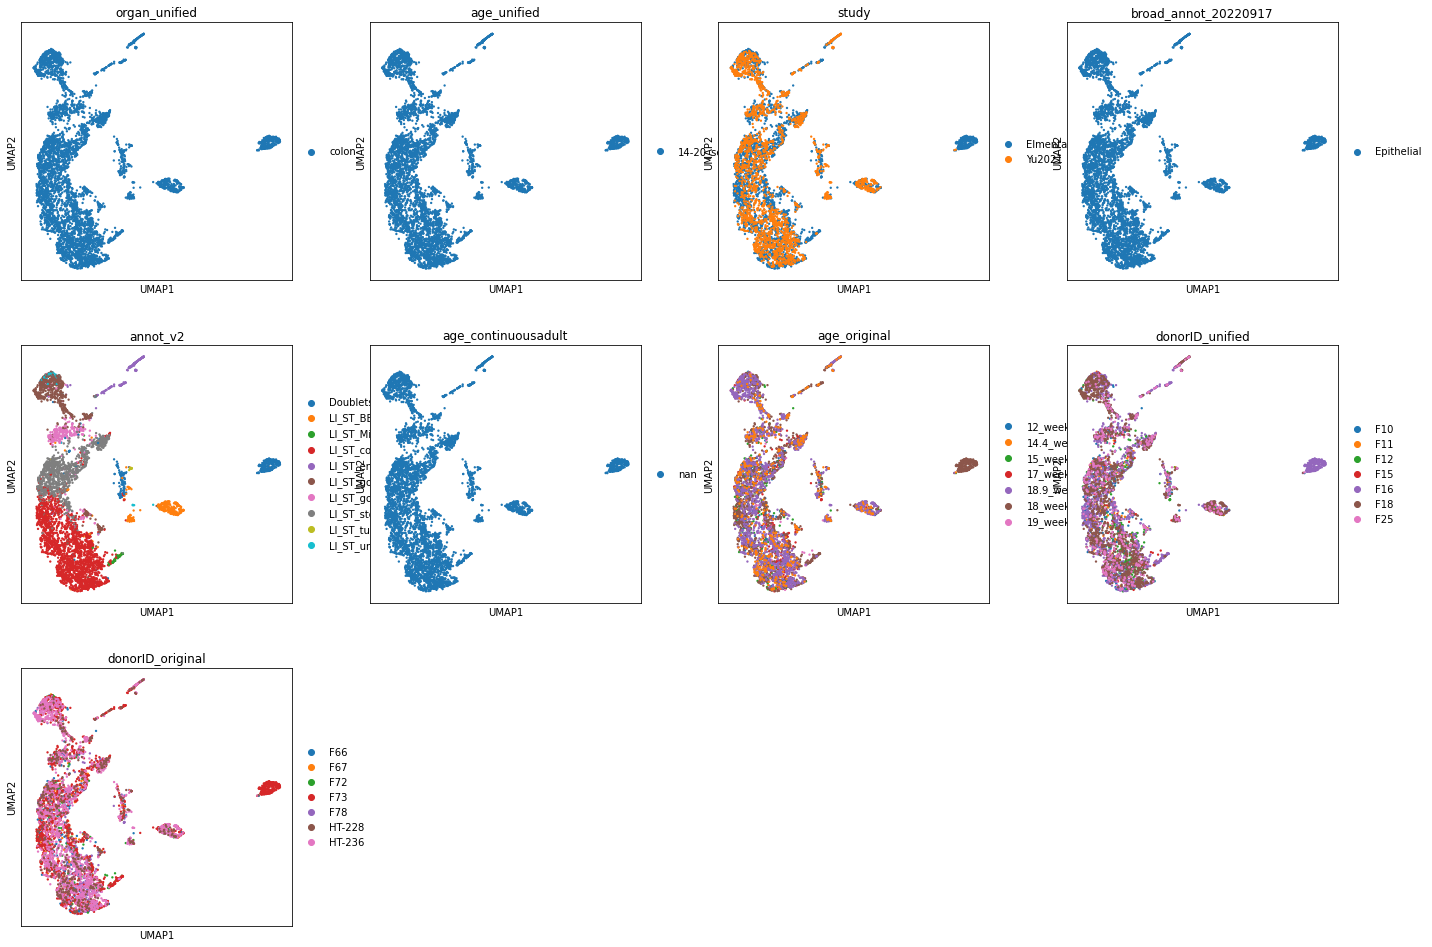

In [4]:
plt.rcParams['figure.figsize'] = [5,5]
sc.pl.umap(adata, color=['organ_unified', 'age_unified','study','broad_annot_20220917','annot_v2','age_continuousadult','age_original','donorID_unified','donorID_original'],cmap='OrRd')

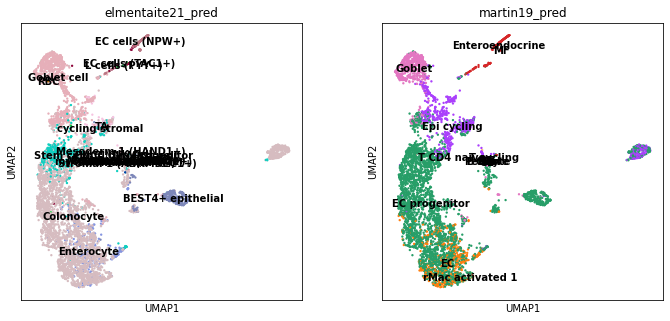

In [5]:
sc.pl.umap(adata, color=['elmentaite21_pred','martin19_pred'],legend_loc='on data')

In [6]:
adata.X.max()

7608.0

In [7]:
#save raw counts in layers
adata.layers['counts'] = adata.X
#normalise and transform
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [8]:
adata.X.max()

8.622033

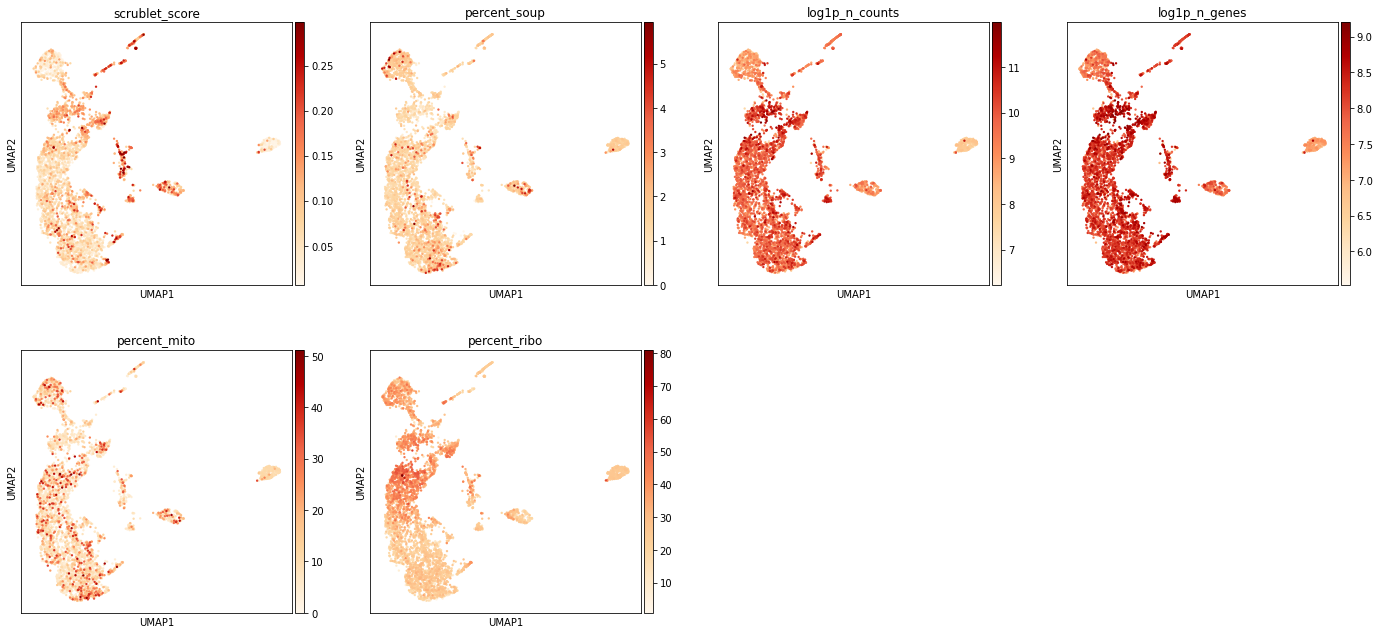

In [9]:
#plot some basic QC
sc.pl.umap(adata, color = ['scrublet_score','percent_soup','log1p_n_counts','log1p_n_genes','percent_mito','percent_ribo'],cmap='OrRd')

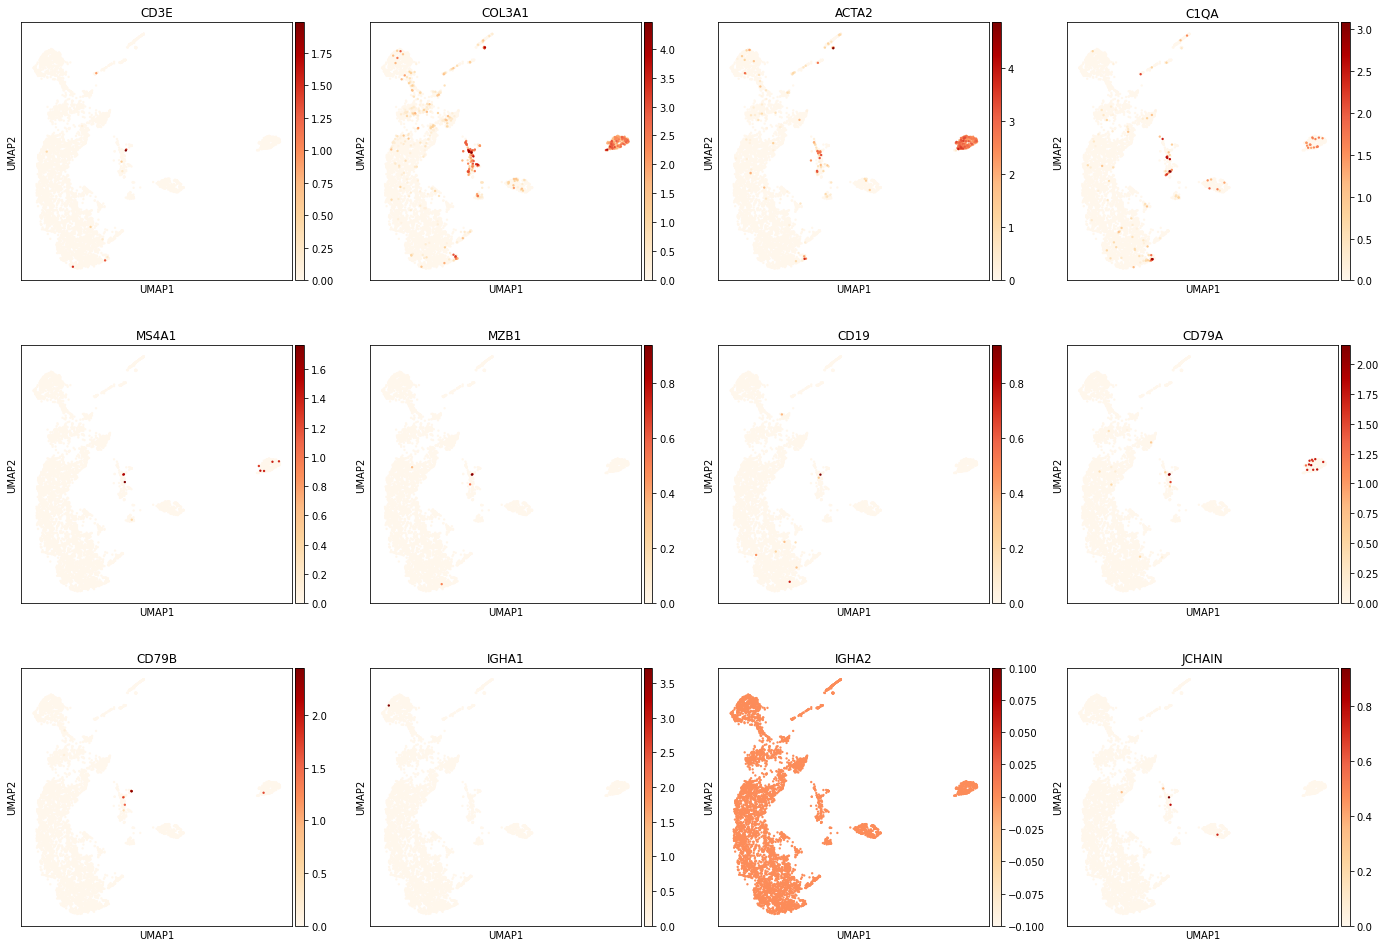

In [10]:
#plot doublet genes
sc.pl.umap(adata, color = ['CD3E','COL3A1','ACTA2','C1QA','MS4A1','MZB1','CD19','CD79A','CD79B','IGHA1','IGHA2','JCHAIN'],cmap='OrRd')

In [11]:
#score cell cycle genes
cell_cycle_genes = ['MCM5',
'PCNA',
 'TYMS',
 'FEN1',
 'MCM2',
 'MCM4',
 'RRM1',
 'UNG',
 'GINS2',
 'MCM6',
 'CDCA7',
 'DTL',
 'PRIM1',
 'UHRF1',
 'MLF1IP',
 'HELLS',
 'RFC2',
 'RPA2',
 'NASP',
 'RAD51AP1',
 'GMNN',
 'WDR76',
 'SLBP',
 'CCNE2',
 'UBR7',
 'POLD3',
 'MSH2',
 'ATAD2',
 'RAD51',
 'RRM2',
 'CDC45',
 'CDC6',
 'EXO1',
 'TIPIN',
 'DSCC1',
 'BLM',
 'CASP8AP2',
 'USP1',
 'CLSPN',
 'POLA1',
 'CHAF1B',
 'BRIP1',
 'E2F8',
 'HMGB2',
 'CDK1',
 'NUSAP1',
 'UBE2C',
 'BIRC5',
 'TPX2',
 'TOP2A',
 'NDC80',
 'CKS2',
 'NUF2',
 'CKS1B',
 'MKI67',
 'TMPO',
 'CENPF',
 'TACC3',
 'FAM64A',
 'SMC4',
 'CCNB2',
 'CKAP2L',
 'CKAP2',
 'AURKB',
 'BUB1',
 'KIF11',
 'ANP32E',
 'TUBB4B',
 'GTSE1',
 'KIF20B',
 'HJURP',
 'CDCA3',
 'HN1',
 'CDC20',
 'TTK',
 'CDC25C',
 'KIF2C',
 'RANGAP1',
 'NCAPD2',
 'DLGAP5',
 'CDCA2',
 'CDCA8',
 'ECT2',
 'KIF23',
 'HMMR',
 'AURKA',
 'PSRC1',
 'ANLN',
 'LBR',
 'CKAP5',
 'CENPE',
 'CTCF',
 'NEK2',
 'G2E3',
 'GAS2L3',
 'CBX5',
 'CENPA']

In [12]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
adata = adata[adata.obs.G2M_score.sort_values(ascending=True).index].copy()

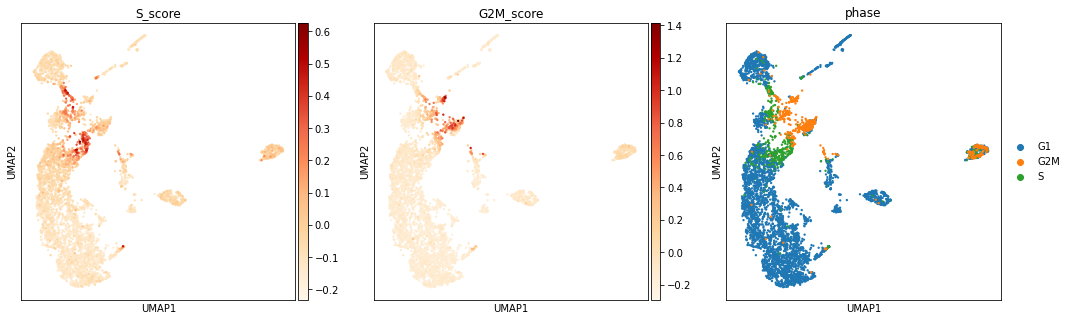

In [13]:
sc.pl.umap(adata,color=['S_score', 'G2M_score', 'phase'],cmap='OrRd')

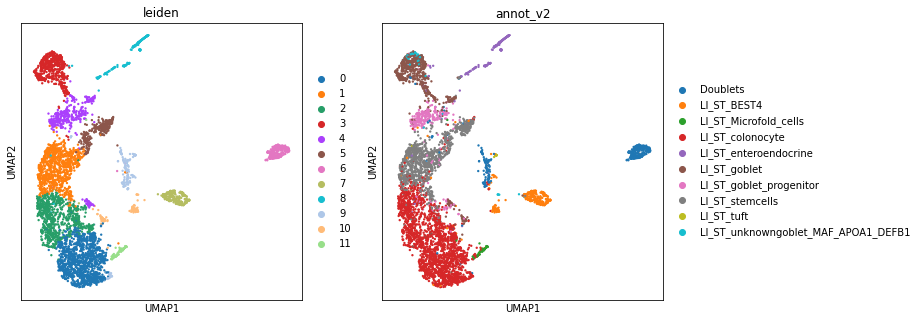

In [14]:
sc.tl.leiden(adata, resolution = 0.5, neighbors_key="neighbors_scvi")
sc.pl.umap(adata,color=['leiden','annot_v2'])

In [15]:
import sys
sys.path.append("/home/jovyan/ao15/Megagut/")
from re5_combine import *

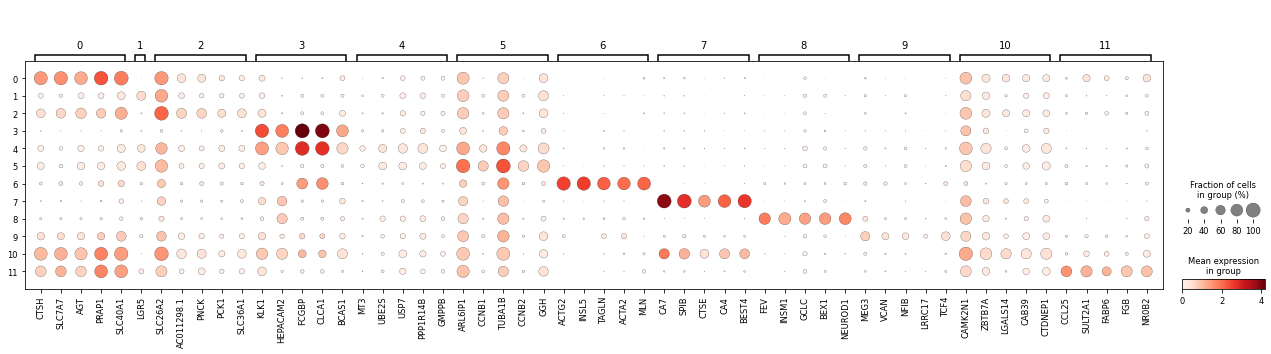

In [16]:
adata.raw = adata.copy()
mkst = calc_marker_stats(adata, groupby="leiden")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(adata, groupby='leiden', mks=mks)

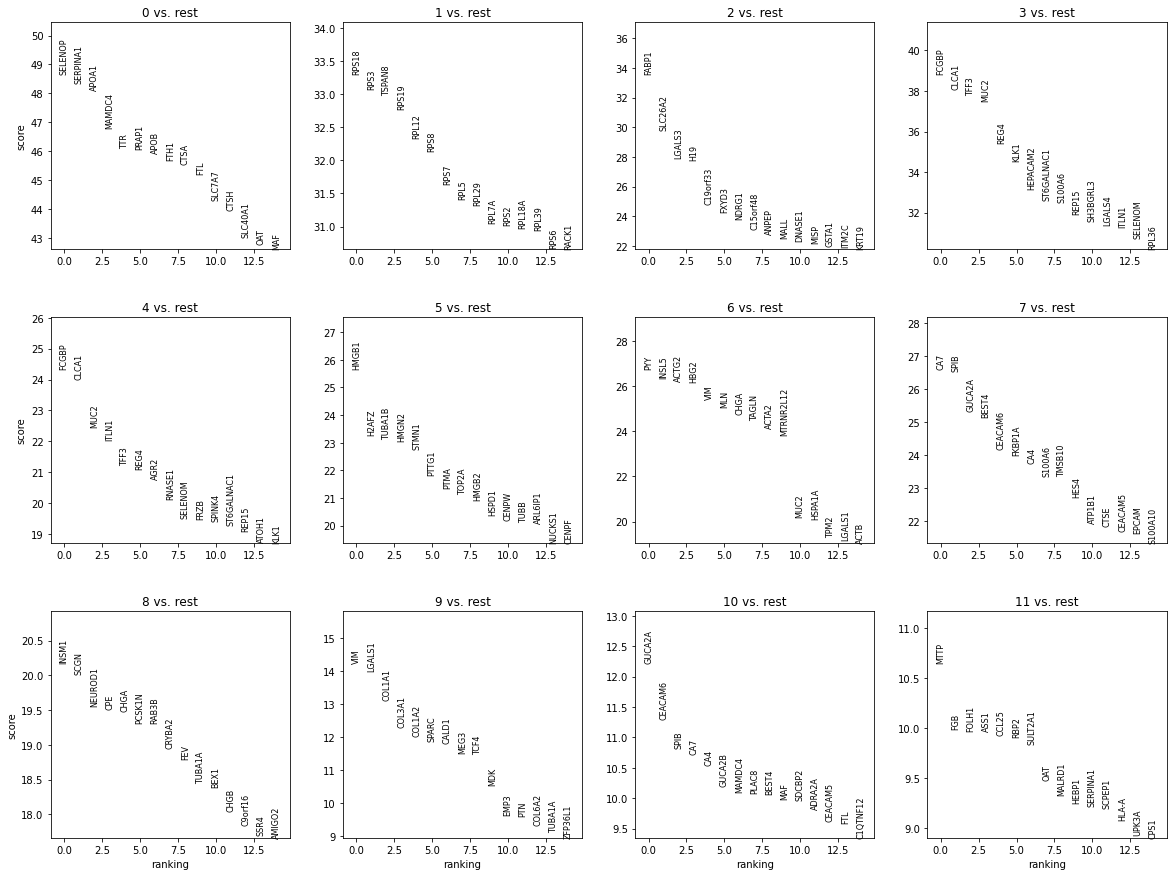

In [17]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

In [18]:
pd.set_option('display.max_columns', 100)
pd.crosstab(adata.obs.annot_v2,adata.obs.leiden)

leiden                                  0    1    2    3    4    5    6    7  \
annot_v2                                                                       
Doublets                                5    3    2    3    6    6  278    0   
LI_ST_BEST4                             4    7    4    2    2    1    0  260   
LI_ST_Microfold_cells                   1    2    0    0    0    0    0    0   
LI_ST_colonocyte                     1238  112  721    0    2   18    1    1   
LI_ST_enteroendocrine                   0    0    0    6    2    2    0    0   
LI_ST_goblet                            4    1   12  545  142    0    0    1   
LI_ST_goblet_progenitor                 1   14   24    9  240    9    0    0   
LI_ST_stemcells                         1  802   24    2   14  284    1    1   
LI_ST_tuft                              0    1    0    0    0    0    0    0   
LI_ST_unknowngoblet_MAF_APOA1_DEFB1     0    0    0   52    2    0    0    2   

leiden                                 8    9  10  11  
annot_v2                                               
Doublets                               1  116   0   0  
LI_ST_BEST4                            0   15  75   1  
LI_ST_Microfold_cells                  0    0   0  56  
LI_ST_colonocyte                       0   31   4  19  
LI_ST_enteroendocrine                198    0   0   0  
LI_ST_goblet                           5    0  32   0  
LI_ST_goblet_progenitor                0    1   3   0  
LI_ST_stemcells                        7    0   0   1  
LI_ST_tuft                             0   18   0   0  
LI_ST_unknowngoblet_MAF_APOA1_DEFB1    1    1   4   0

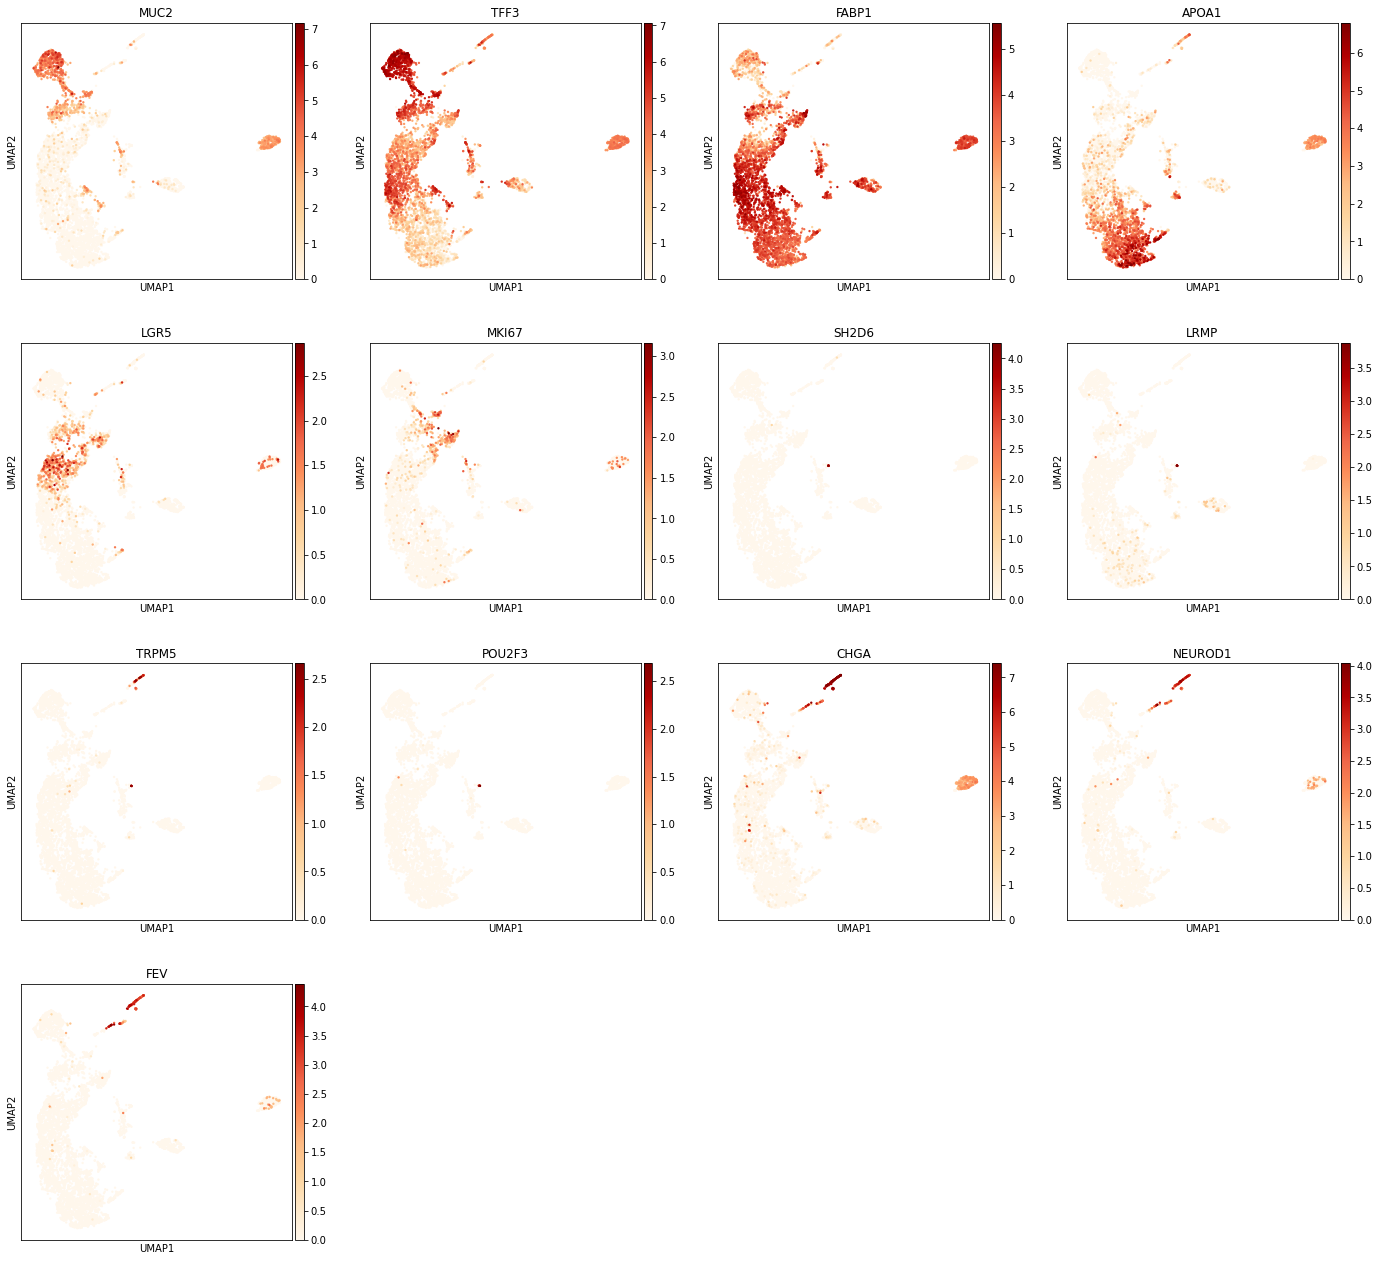

In [23]:
sc.pl.umap(adata,color=['MUC2','TFF3','FABP1','APOA1','LGR5','MKI67','SH2D6','LRMP','TRPM5','POU2F3','CHGA','NEUROD1','FEV'],cmap='OrRd')

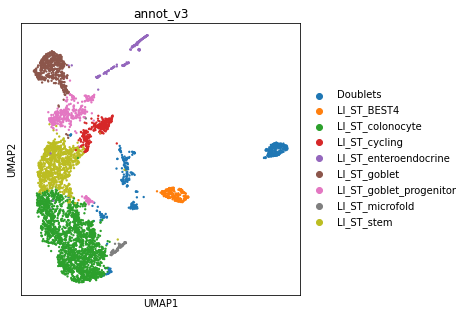

In [25]:
new_cluster_names = [
    'LI_ST_colonocyte','LI_ST_stem', #0,1
    'LI_ST_colonocyte','LI_ST_goblet', #2,3
    'LI_ST_goblet_progenitor','LI_ST_cycling', #4,5
    'Doublets','LI_ST_BEST4', #6,7 
   'LI_ST_enteroendocrine','Doublets',#8,9
    'Doublets','LI_ST_microfold'#10,11


]

conv = {str(i):name for i,name in enumerate(new_cluster_names)}

adata.obs['annot_v3'] = [conv[x] for x in adata.obs['leiden']]
sc.pl.umap(adata,color='annot_v3')

In [26]:
col = adata[adata.obs.annot_v3.isin(['LI_ST_colonocyte'])].copy()

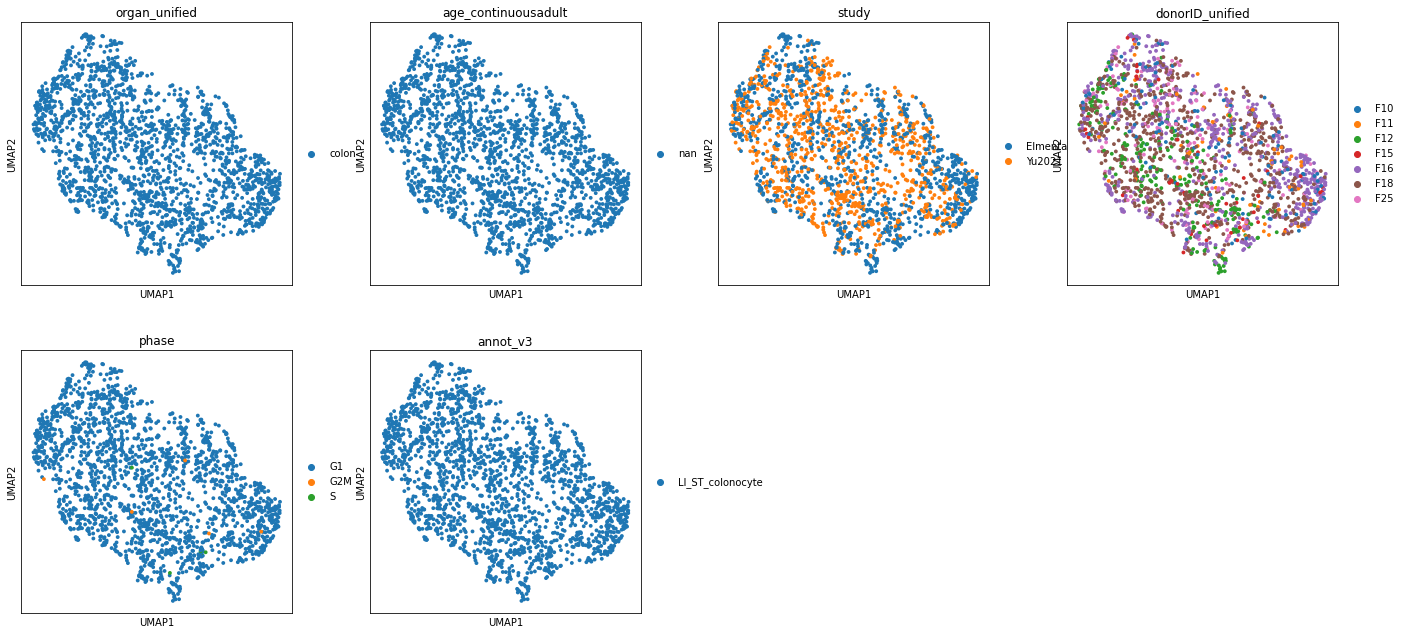

In [27]:
sc.pp.neighbors(
        col,
            use_rep="X_scvi",
            n_pcs=col.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(col, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(col, color=['organ_unified', 'age_continuousadult','study','donorID_unified','phase','annot_v3'])

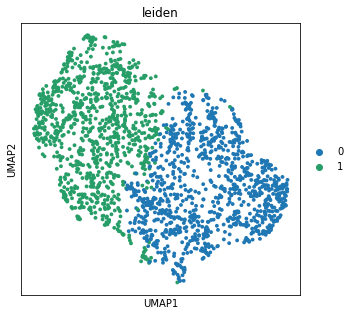

In [28]:
sc.tl.leiden(col, resolution = 0.2, neighbors_key="neighbors_scvi")
sc.pl.umap(col, color=['leiden'])

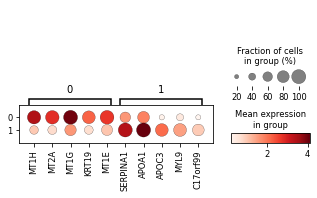

In [29]:
col.raw = col.copy()
mkst = calc_marker_stats(col, groupby="leiden")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(col, groupby='leiden', mks=mks)

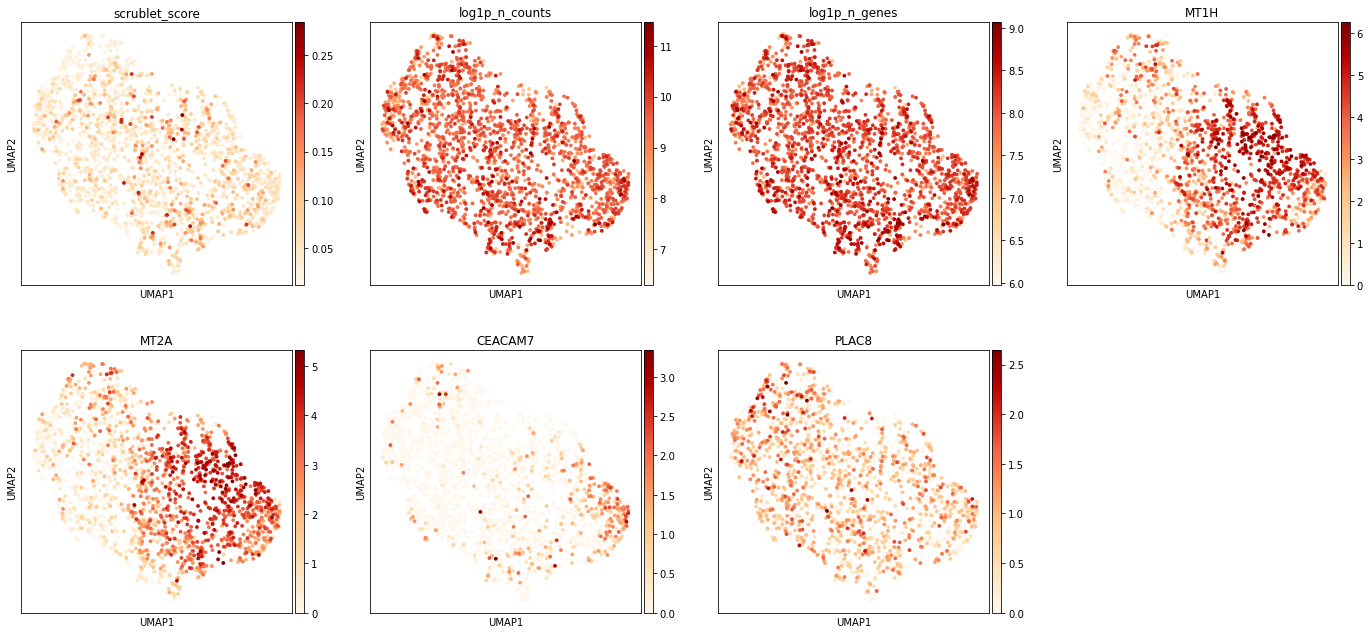

In [33]:
sc.pl.umap(col,color=['scrublet_score','log1p_n_counts','log1p_n_genes','MT1H','MT2A','CEACAM7','PLAC8'],cmap='OrRd')

In [34]:
gob = adata[adata.obs.annot_v3.isin(['LI_ST_goblet','LI_ST_goblet_progenitor'])].copy()

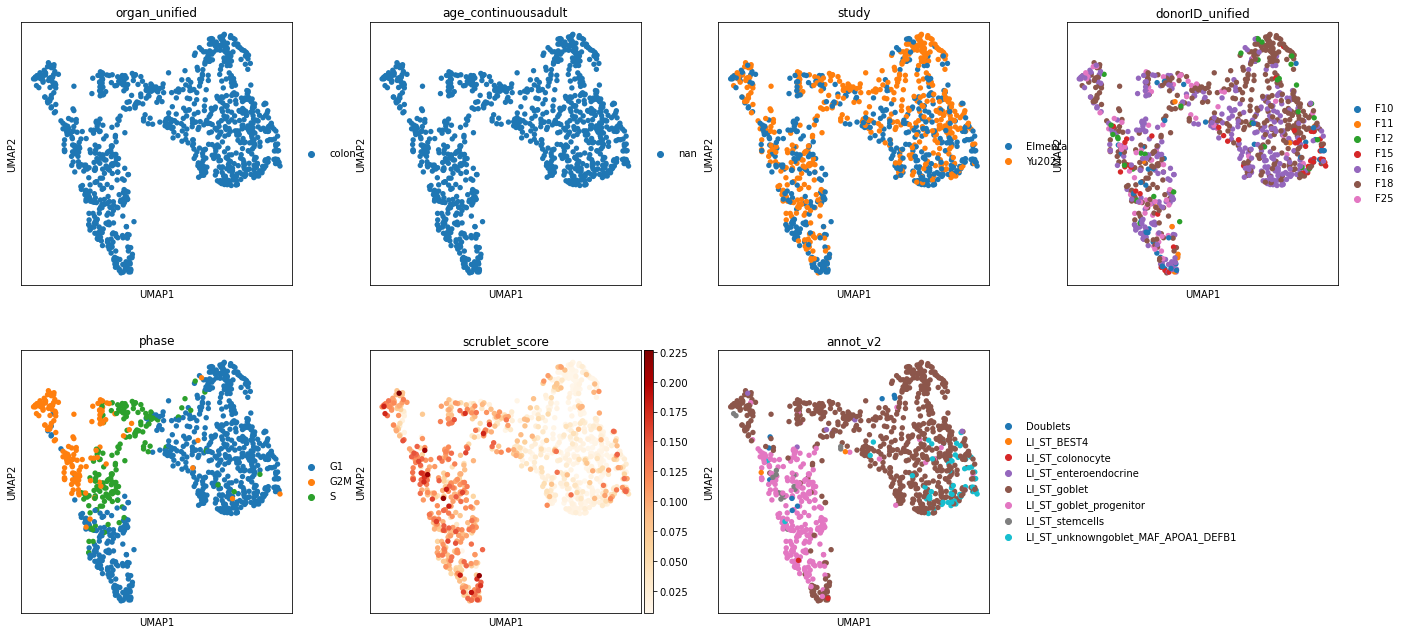

In [35]:
sc.pp.neighbors(
            gob,
            use_rep="X_scvi",
            n_pcs=gob.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(gob, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(gob, color=['organ_unified', 'age_continuousadult','study','donorID_unified','phase','scrublet_score','annot_v2'],cmap='OrRd')

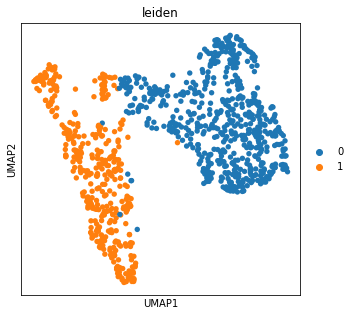

In [55]:
sc.tl.leiden(gob, resolution = 0.1, neighbors_key="neighbors_scvi")
sc.pl.umap(gob, color=['leiden'])

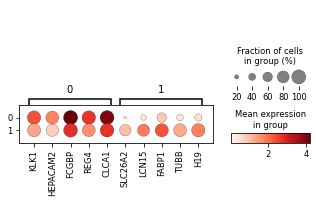

In [56]:
gob.raw = gob.copy()
mkst = calc_marker_stats(gob, groupby="leiden")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(gob, groupby='leiden', mks=mks)

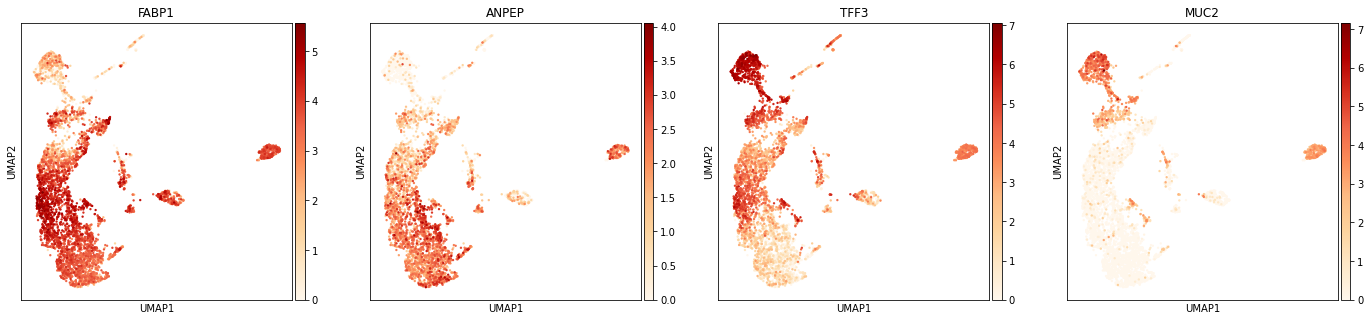

In [59]:
sc.pl.umap(adata,color=['FABP1','ANPEP','TFF3','MUC2'],cmap='OrRd')

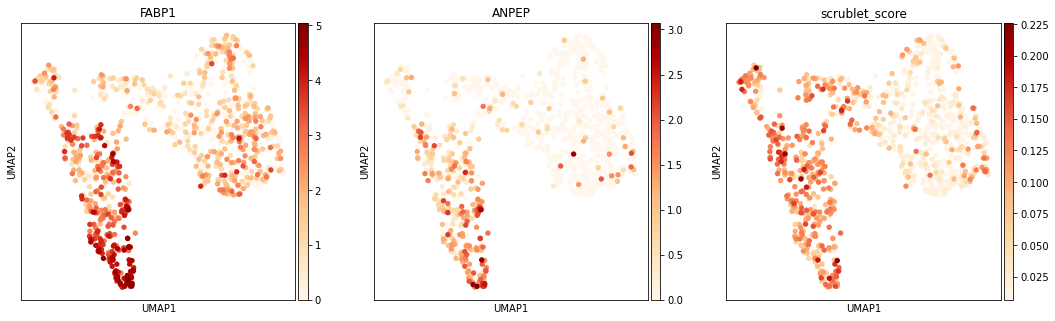

In [58]:
sc.pl.umap(gob,color=['FABP1','ANPEP','scrublet_score'],cmap='OrRd')

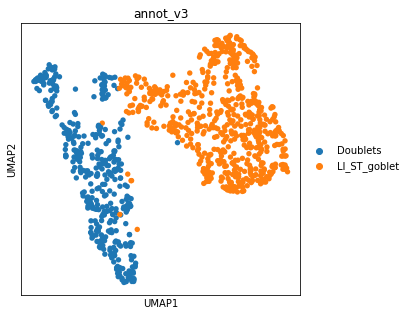

In [60]:
new_cluster_names = [
    'LI_ST_goblet','Doublets'

]

conv = {str(i):name for i,name in enumerate(new_cluster_names)}

gob.obs['annot_v3'] = [conv[x] for x in gob.obs['leiden']]
sc.pl.umap(gob,color='annot_v3')

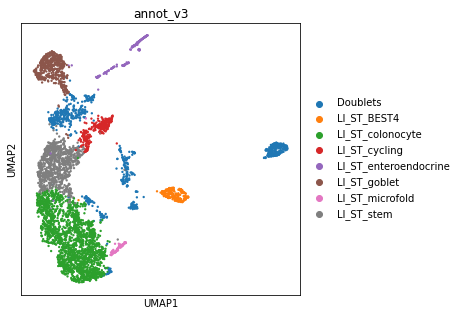

In [61]:
ON = {O:N for O,N in zip(gob.obs_names,gob.obs["annot_v3"])}
adata.obs["annot_v3"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names, adata.obs["annot_v3"])]
sc.pl.umap(adata,color='annot_v3')

In [62]:
eec = adata[adata.obs.annot_v3.isin(['LI_ST_enteroendocrine'])].copy()

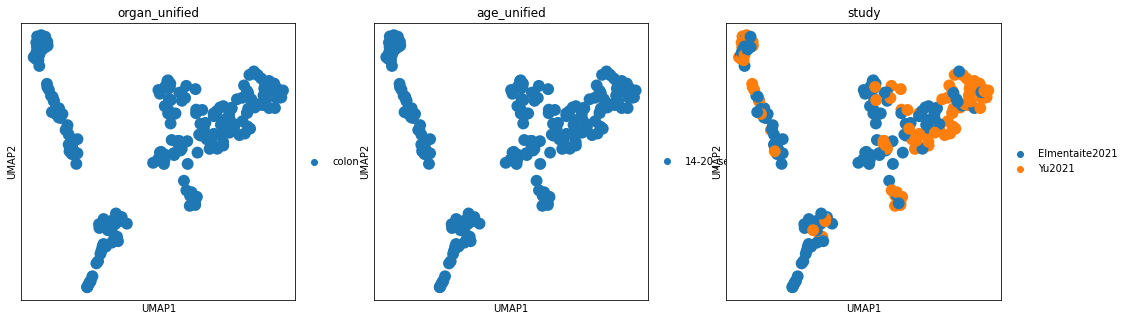

In [63]:
sc.pp.neighbors(
            eec,
            use_rep="X_scvi",
            n_pcs=eec.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(eec, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(eec, color=['organ_unified', 'age_unified','study'])

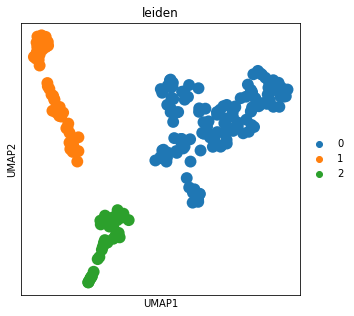

In [64]:
sc.tl.leiden(eec, resolution = 0.2, neighbors_key="neighbors_scvi")
sc.pl.umap(eec, color=['leiden'])

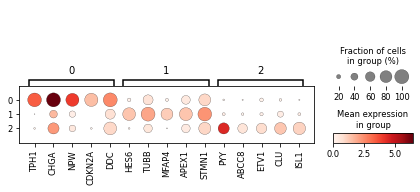

In [66]:
eec.raw = eec.copy()
mkst = calc_marker_stats(eec, groupby="leiden")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(eec, groupby='leiden', mks=mks)

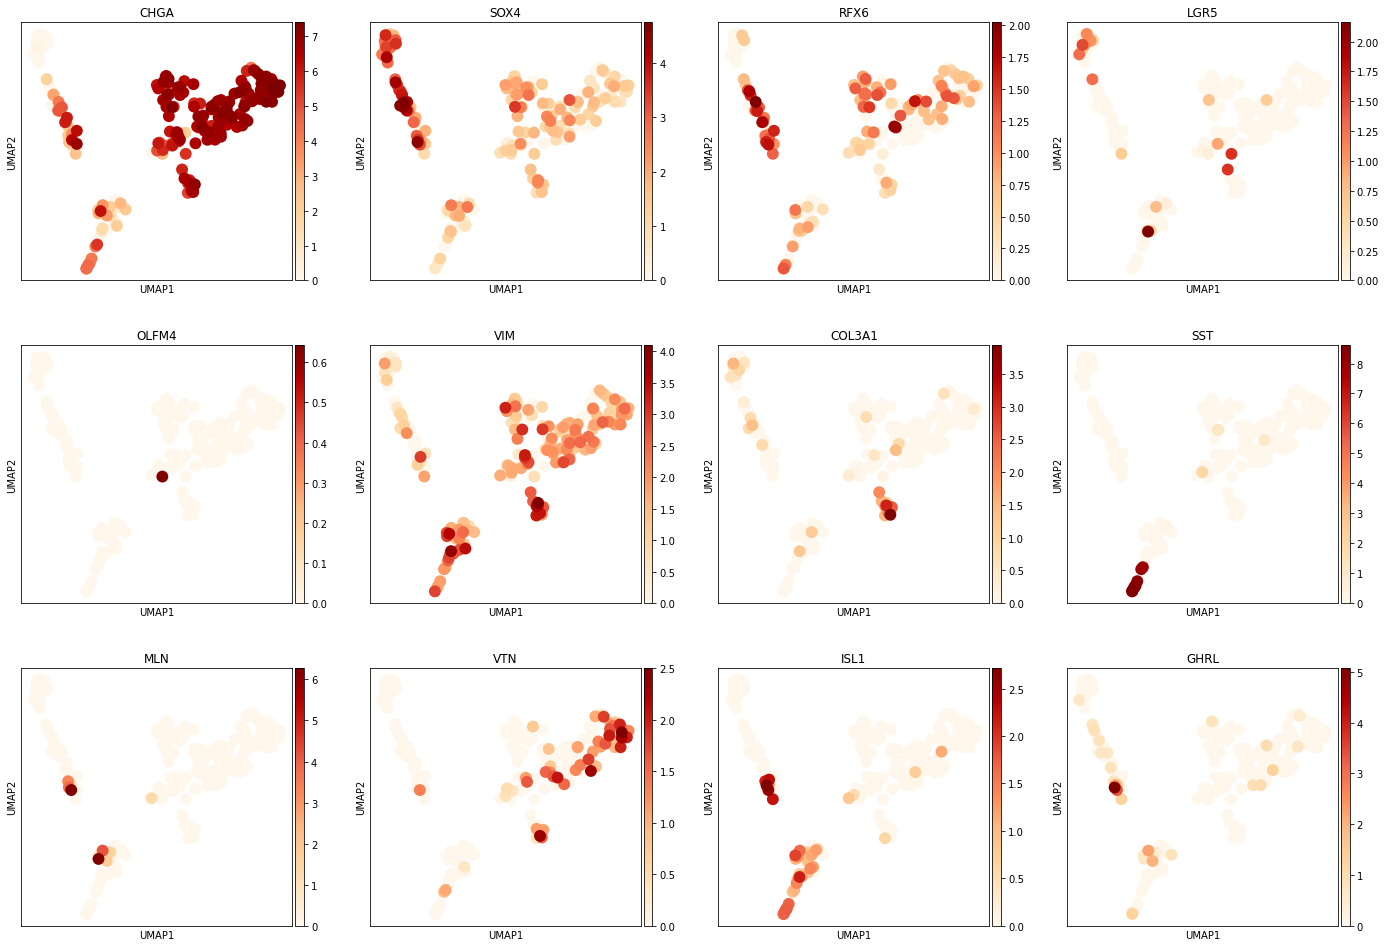

In [67]:
sc.pl.umap(eec,color=['CHGA','SOX4','RFX6','LGR5','OLFM4','VIM','COL3A1','SST','MLN','VTN','ISL1','GHRL'],cmap='OrRd')

In [68]:
new_cluster_names = [
    'LI_ST_enteroendocrine','LI_ST_enteroendocrine_SOX4', #0,1
    'LI_ST_enteroendocrine'#2

]

conv = {str(i):name for i,name in enumerate(new_cluster_names)}

eec.obs['annot_v3'] = [conv[x] for x in eec.obs['leiden']]

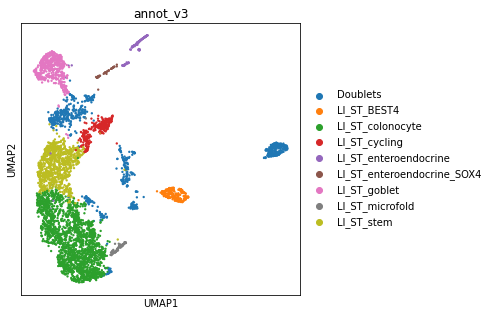

In [69]:
ON = {O:N for O,N in zip(eec.obs_names,eec.obs["annot_v3"])}
adata.obs["annot_v3"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names, adata.obs["annot_v3"])]
sc.pl.umap(adata,color='annot_v3')

In [70]:
cycling = adata[adata.obs.annot_v3.isin(['LI_ST_cycling'])].copy()

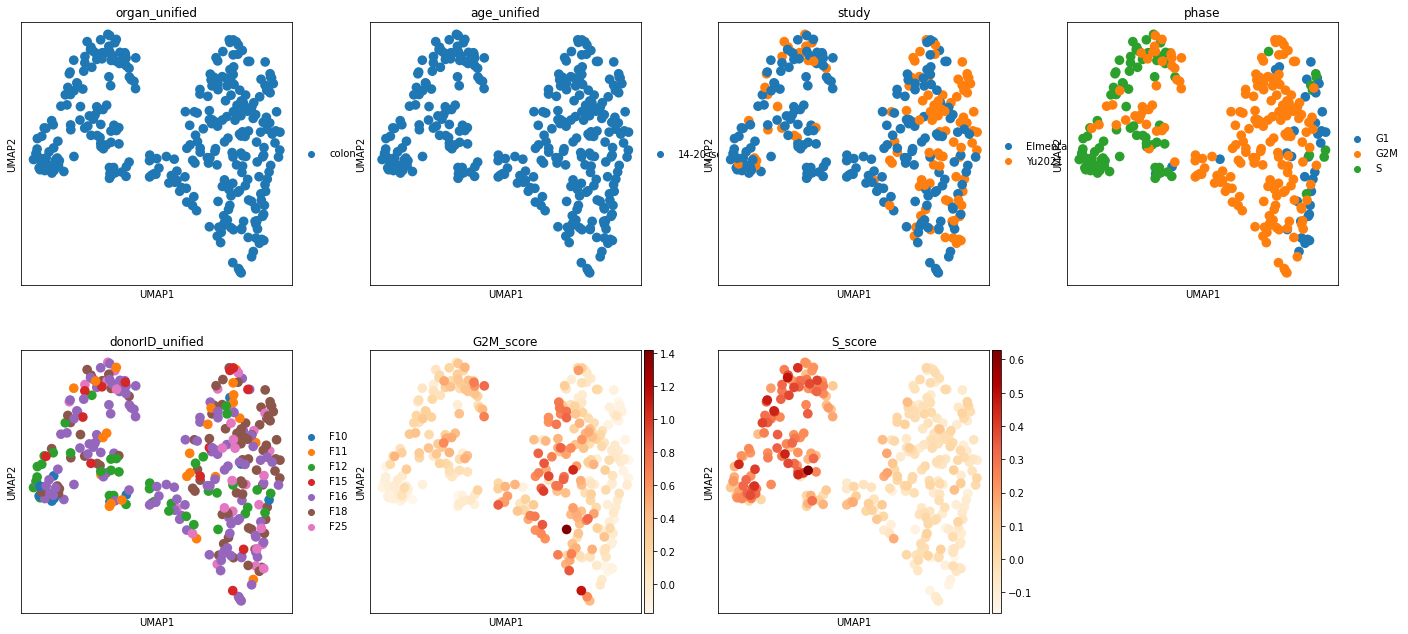

In [76]:
sc.pp.neighbors(
            cycling,
            use_rep="X_scvi",
            n_pcs=cycling.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(cycling, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(cycling, color=['organ_unified', 'age_unified','study','phase','donorID_unified','G2M_score','S_score'],cmap='OrRd')

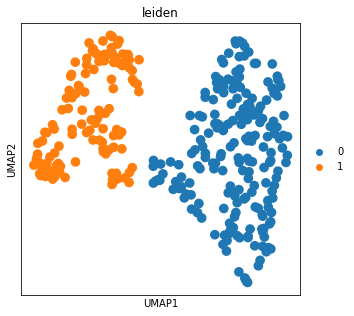

In [74]:
sc.tl.leiden(cycling, resolution = 0.2, neighbors_key="neighbors_scvi")
sc.pl.umap(cycling, color=['leiden'])

In [78]:
new_cluster_names = [
    'LI_ST_cycling_G2M','LI_AP_cycling_S'
]

conv = {str(i):name for i,name in enumerate(new_cluster_names)}

cycling.obs['annot_v3'] = [conv[x] for x in cycling.obs['leiden']]

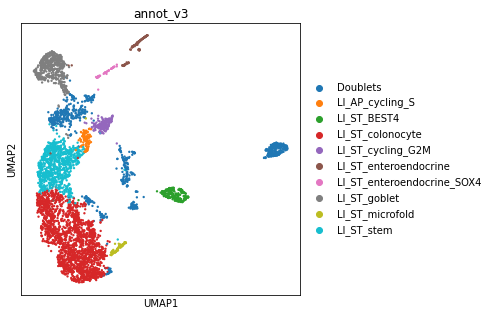

In [79]:
ON = {O:N for O,N in zip(cycling.obs_names,cycling.obs["annot_v3"])}
adata.obs["annot_v3"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names, adata.obs["annot_v3"])]
sc.pl.umap(adata,color='annot_v3')

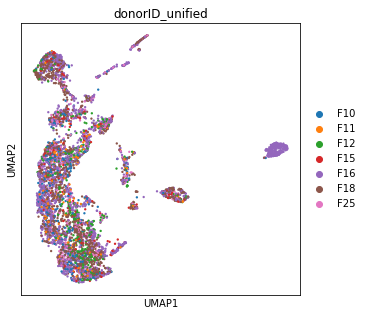

In [80]:
sc.pl.umap(adata,color='donorID_unified')

In [81]:
pd.crosstab(adata.obs.annot_v3,adata.obs.donorID_unified)

donorID_unified             F10  F11  F12  F15  F16  F18  F25
annot_v3                                                     
Doublets                     47   19   49   22  487  271   96
LI_AP_cycling_S               7    9   19    6   50   22    6
LI_ST_BEST4                   4    5   17    9   68  139   23
LI_ST_colonocyte            142   69  252   53  610  719  196
LI_ST_cycling_G2M             3   15   20    7   69   63   24
LI_ST_enteroendocrine         1    2    1    4   82   58   15
LI_ST_enteroendocrine_SOX4    4    0    0    1   25   10    9
LI_ST_goblet                 15    5   20   28  215  307   28
LI_ST_microfold               0    1    0    8   64    4    0
LI_ST_stem                  102   54   77   32  310  285   82

In [82]:
adata.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/LI_ST_epi.hvg5000_noRPL.scvi_output.annotv3.20221201.h5ad')

In [83]:
annot = adata.obs.loc[:,['annot_v2','annot_v3']]

In [84]:
annot.to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/LI_ST_epi_annot_v3_draft.csv')

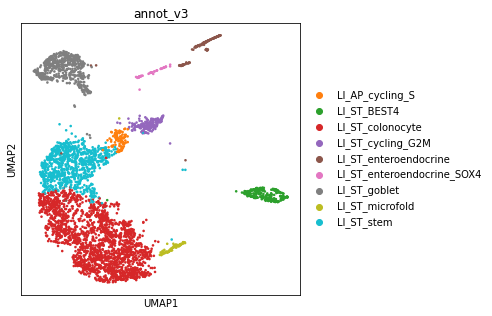

In [85]:
adata_nodoublets = adata[~adata.obs.annot_v3.isin(['Doublets'])].copy()
sc.pl.umap(adata_nodoublets,color='annot_v3')

In [86]:
adata_nodoublets.X.max()

8.622033

In [87]:
#recover raw
adata_nodoublets.X = adata_nodoublets.layers['counts']

In [88]:
adata_nodoublets.X.max()

7608.0

In [89]:
adata_nodoublets.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/LI_ST_epi.raw.annotv3.nodoublets.20221201.h5ad')

In [3]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/LI_ST_epi.hvg5000_noRPL.scvi_output.annotv3.20221201.h5ad')

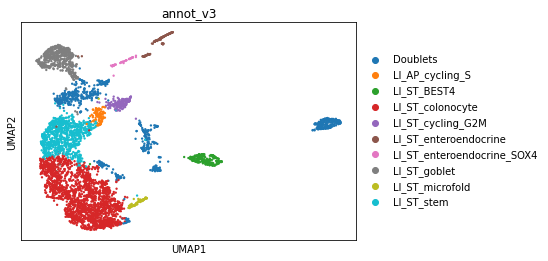

In [4]:
sc.pl.umap(adata,color='annot_v3')

In [5]:
adata.obs['annot_v3'] = (
    adata.obs["annot_v3"]
    .map(lambda x: {'LI_ST_enteroendocrine_SOX4':'LI_ST_enteroendocrine_progenitor'}.get(x, x))
    .astype("category")
)

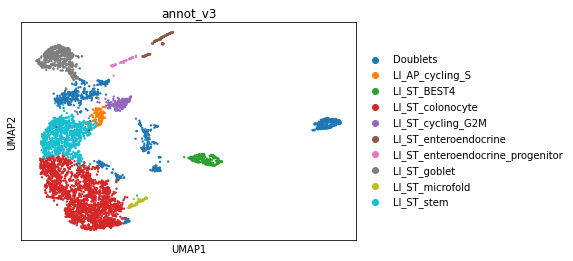

In [6]:
sc.pl.umap(adata,color='annot_v3')

In [7]:
adata.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/LI_ST_epi.hvg5000_noRPL.scvi_output.annotv3.20221206.h5ad')

In [8]:
annot = adata.obs.loc[:,['annot_v2','annot_v3']]

In [9]:
annot.to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/LI_ST_epi_annot_v3_draft.csv')

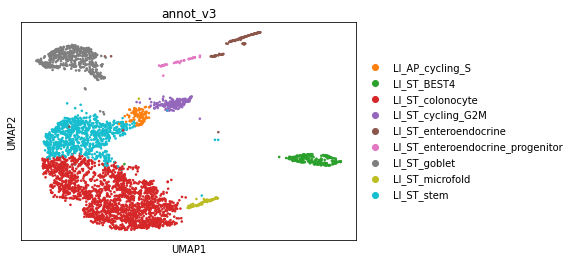

In [10]:
adata_nodoublets = adata[~adata.obs.annot_v3.isin(['Doublets'])].copy()
sc.pl.umap(adata_nodoublets,color='annot_v3')

In [11]:
#recover raw
adata_nodoublets.X = adata_nodoublets.layers['counts']

In [12]:
adata_nodoublets.X.max()

7608.0

In [13]:
adata_nodoublets.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/LI_ST_epi.raw.annotv3.nodoublets.20221206.h5ad')

In [2]:
#make plots for paper figures

In [3]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/LI_ST_epi.hvg5000_noRPL.scvi_output.annotv3.20221206.h5ad')

In [4]:
annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/healthy_annotations_level1to3_20230127.csv',index_col=0)

In [5]:
adata.obs['fine_annot'] = annot.level_3_annot

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


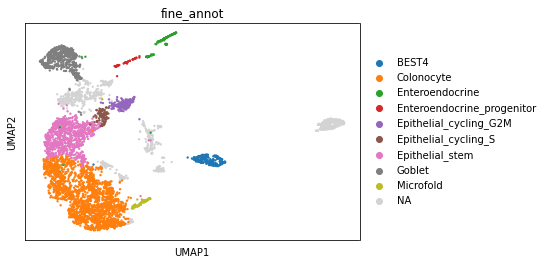

In [6]:
sc.pl.umap(adata,color='fine_annot')

In [7]:
list(adata.obs.fine_annot.unique())

['Colonocyte',
 'Enteroendocrine',
 nan,
 'Epithelial_stem',
 'Microfold',
 'Goblet',
 'BEST4',
 'Enteroendocrine_progenitor',
 'Epithelial_cycling_S',
 'Epithelial_cycling_G2M']

In [8]:
adata = adata[adata.obs.fine_annot.isin(['Colonocyte',
 'Enteroendocrine',
 'Epithelial_stem',
 'Microfold',
 'Goblet',
 'BEST4',
 'Enteroendocrine_progenitor',
 'Epithelial_cycling_S',
 'Epithelial_cycling_G2M'])].copy()

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


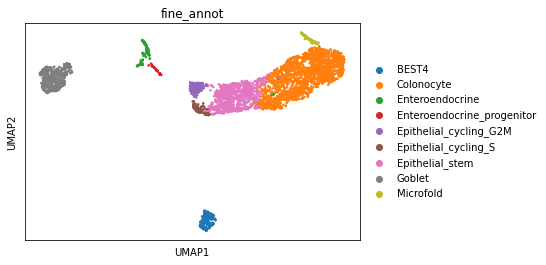

In [9]:
sc.pp.neighbors(
            adata,
            use_rep="X_scvi",
            n_pcs=adata.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(adata, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(adata, color='fine_annot')

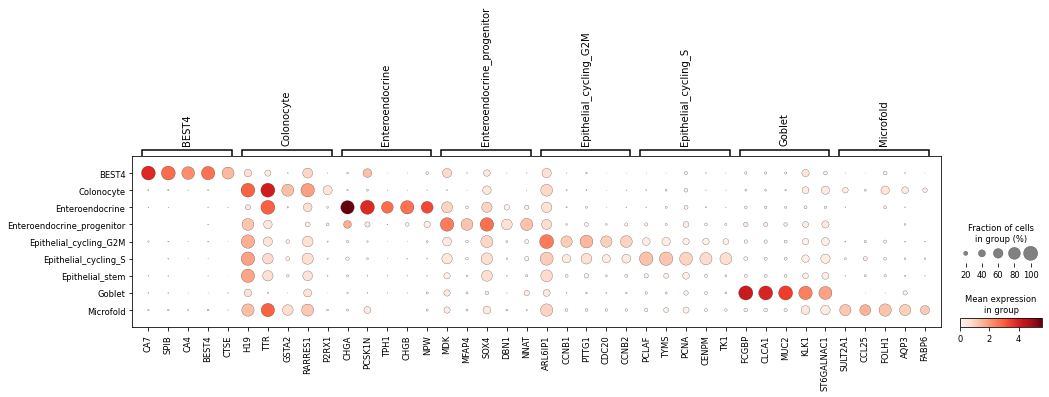

In [11]:
import sys
sys.path.append("/home/jovyan/ao15/Megagut/")
from re5_combine import *
adata.raw = adata.copy()
mkst = calc_marker_stats(adata, groupby="fine_annot")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(adata, groupby='fine_annot', mks=mks)

In [17]:
marker_genes_dict = { 'BEST4 Enterocyte':['BEST4','CA7','OTOP2','SPIB'],
                     'Colonocyte':['CA1','IGF2','GSTA2','H19'],
                     'Enteroendocrine':['CHGA','PCSK1N','TPH1','CHGB'],
                     'Enteroendocrine progenitor':['SOX4','KLK12','NEUROG3','TUBB3',],
                      'Cycling markers':['TOP2A','CCNB1','MKI67','PCLAF','GINS2','PCNA'],
                     'Stem':['LGR5','MYC'],
                     'Goblet':['MUC2','TFF3','FCGBP','ZG16'],
                      'Microfold':['ICAM2','CCL25']
                     }

In [13]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['figure.figsize'] = [5,5]
sc.set_figure_params(dpi=300,dpi_save=600)

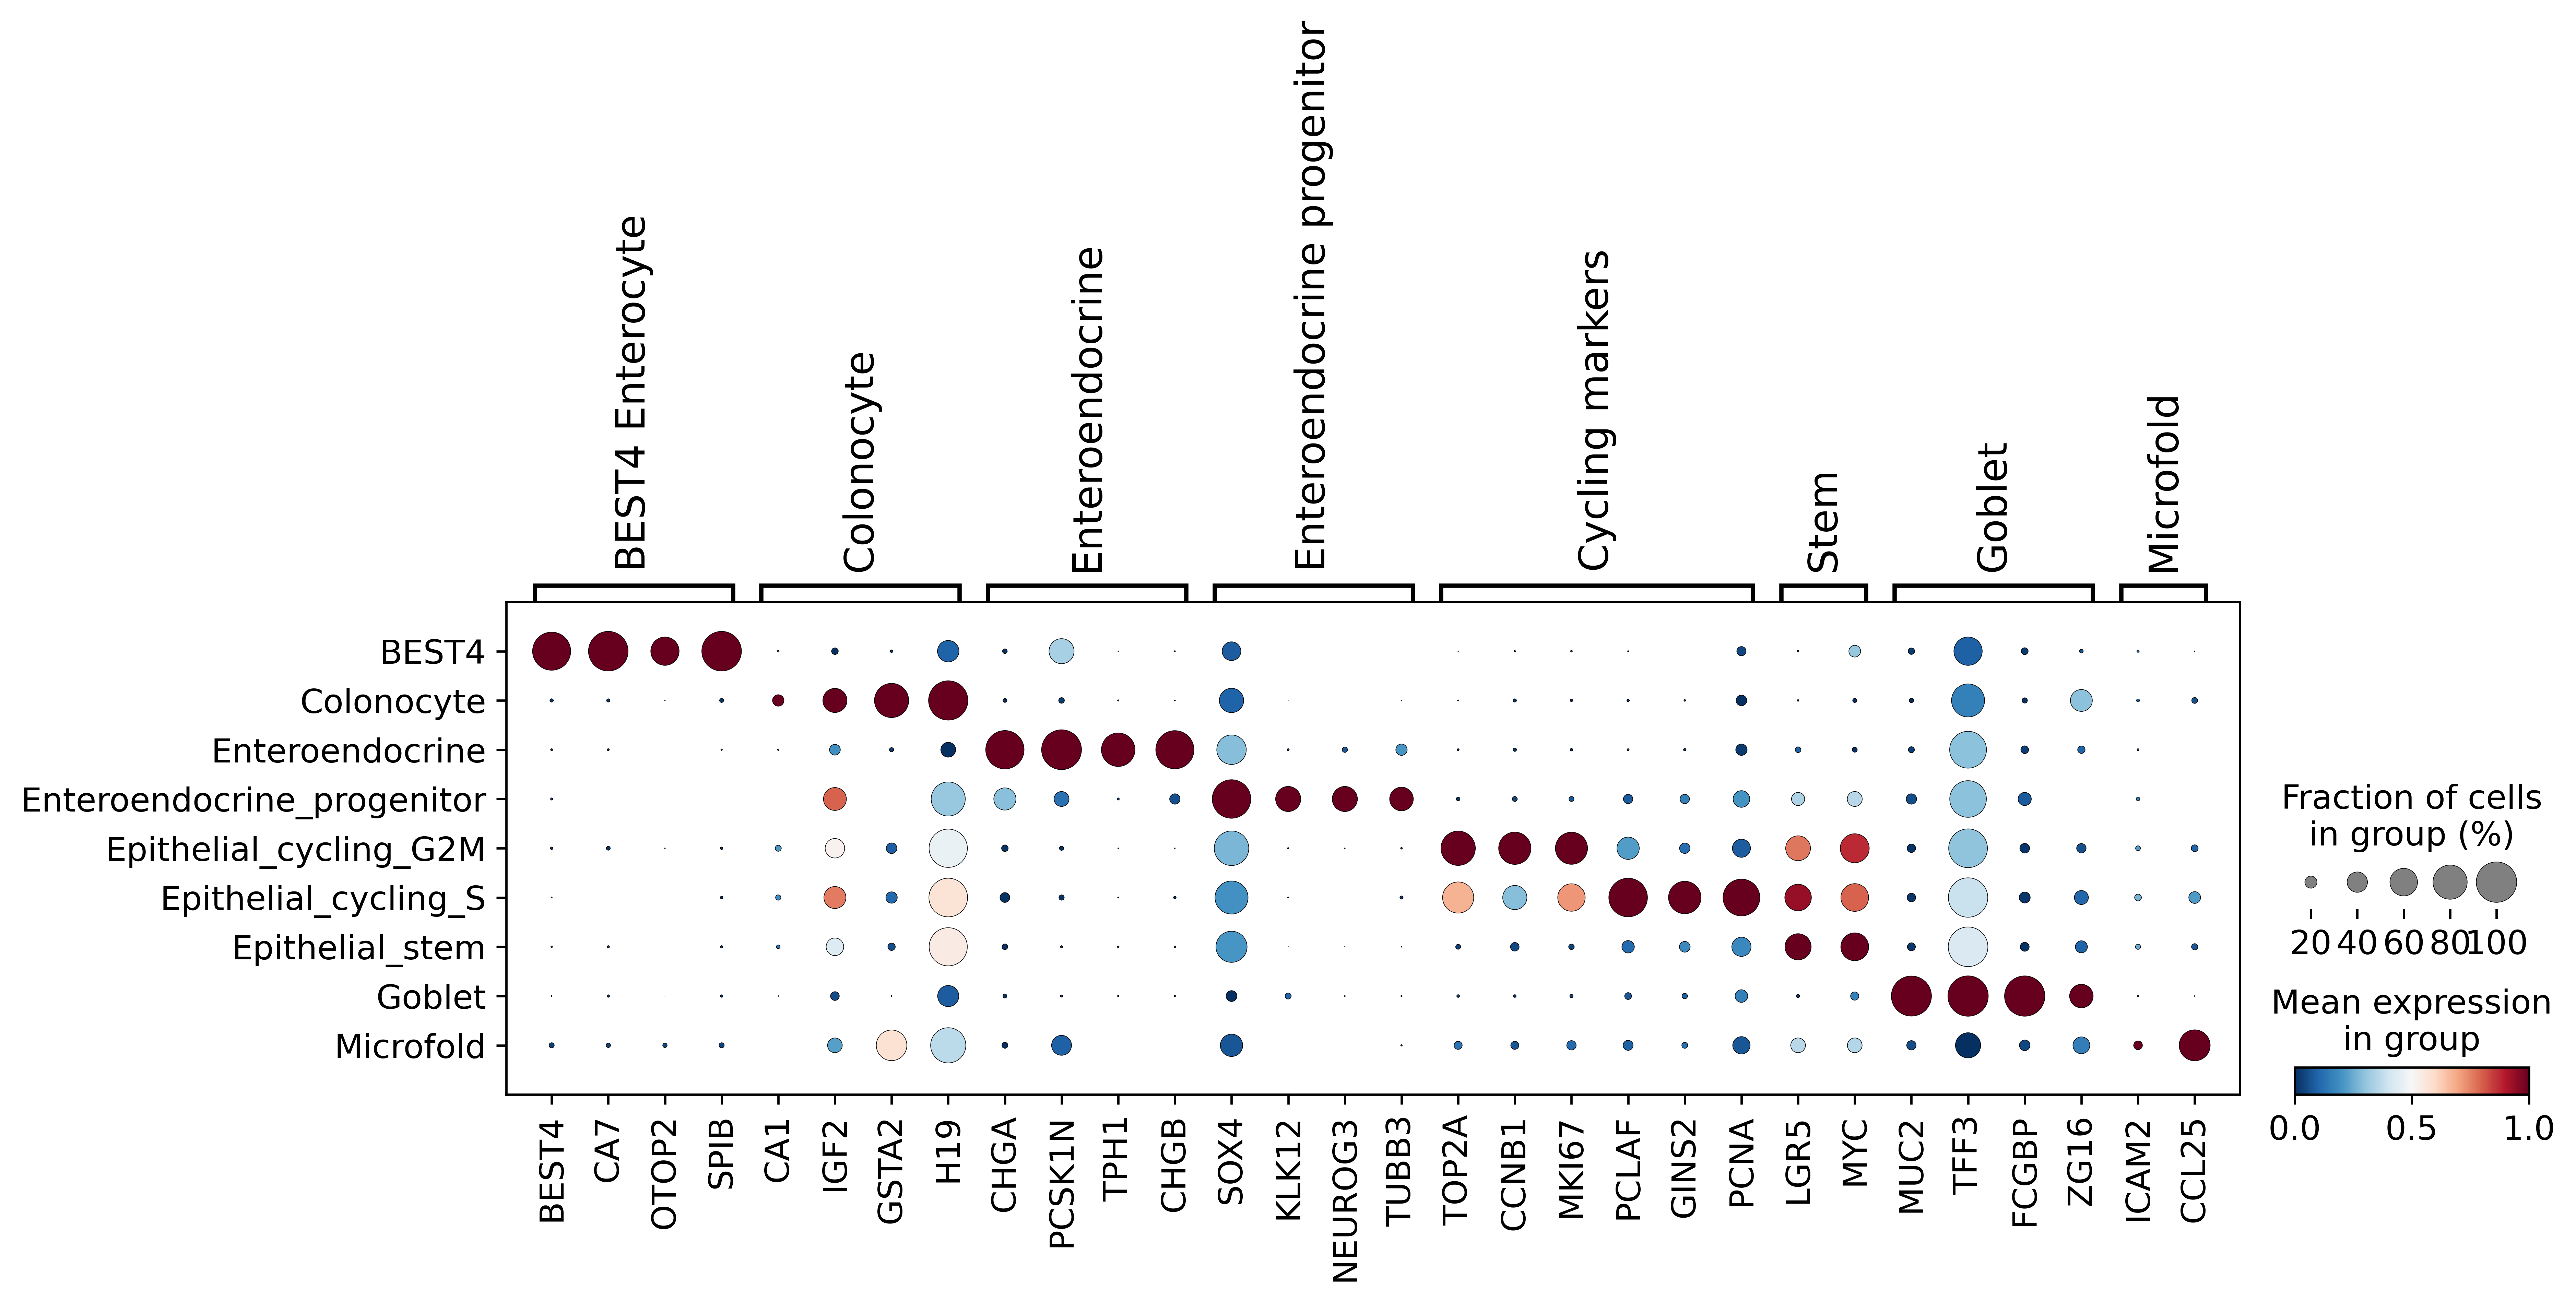

In [18]:
sc.pl.dotplot(adata,var_names=marker_genes_dict,groupby='fine_annot',save='Epi_LI_ST_markers.pdf',color_map='RdBu_r', standard_scale='var')

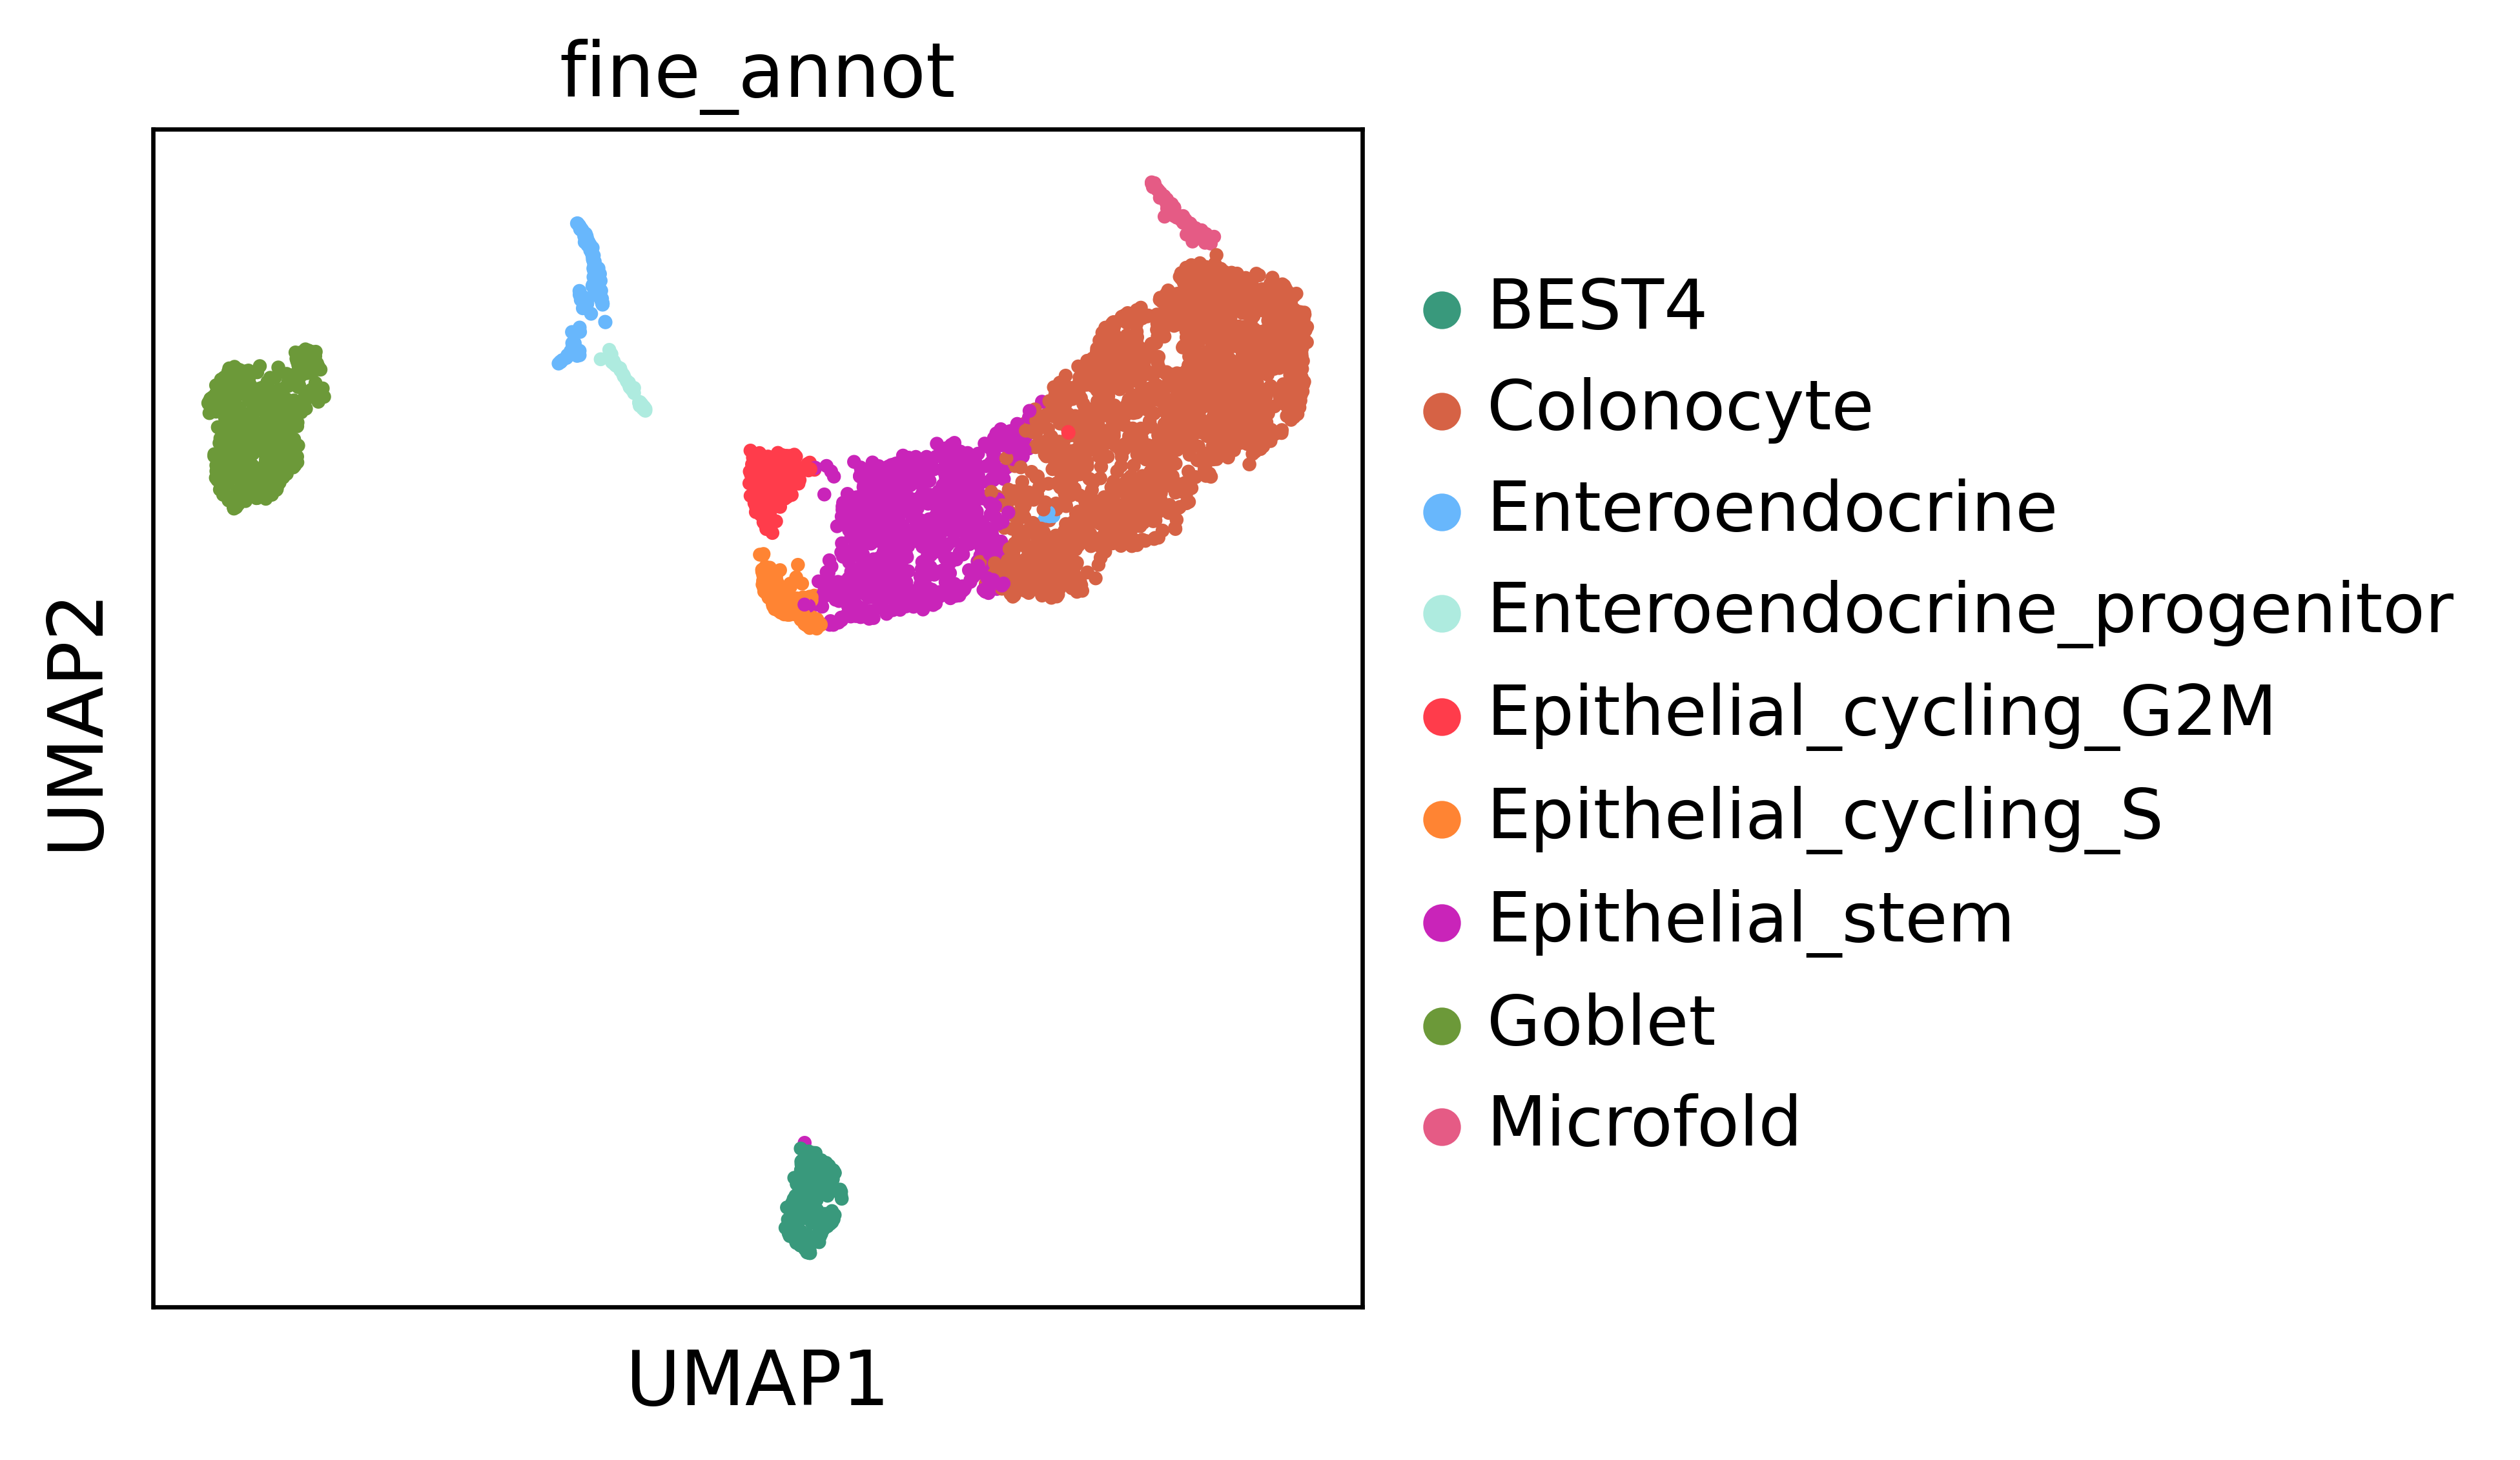

In [19]:
sc.pl.umap(adata,color='fine_annot',palette = ['#39997c',#BEST4
                                               '#d66245',#Colonocyte
                                                '#68b7fc',#enteroendocrine
                                               '#aeebdf',#enteroendocrine progenitor
                                                  '#ff3c4b',#'Epithelial_cycling_G2M': 
                                             '#ff8433',# 'Epithelial_cycling_S': 
                                                  '#c924b9',#stem
                                               '#6c9939',#goblet
                                               '#e55b85',#Microfold
                                               
                                               
    
    
                                              ])

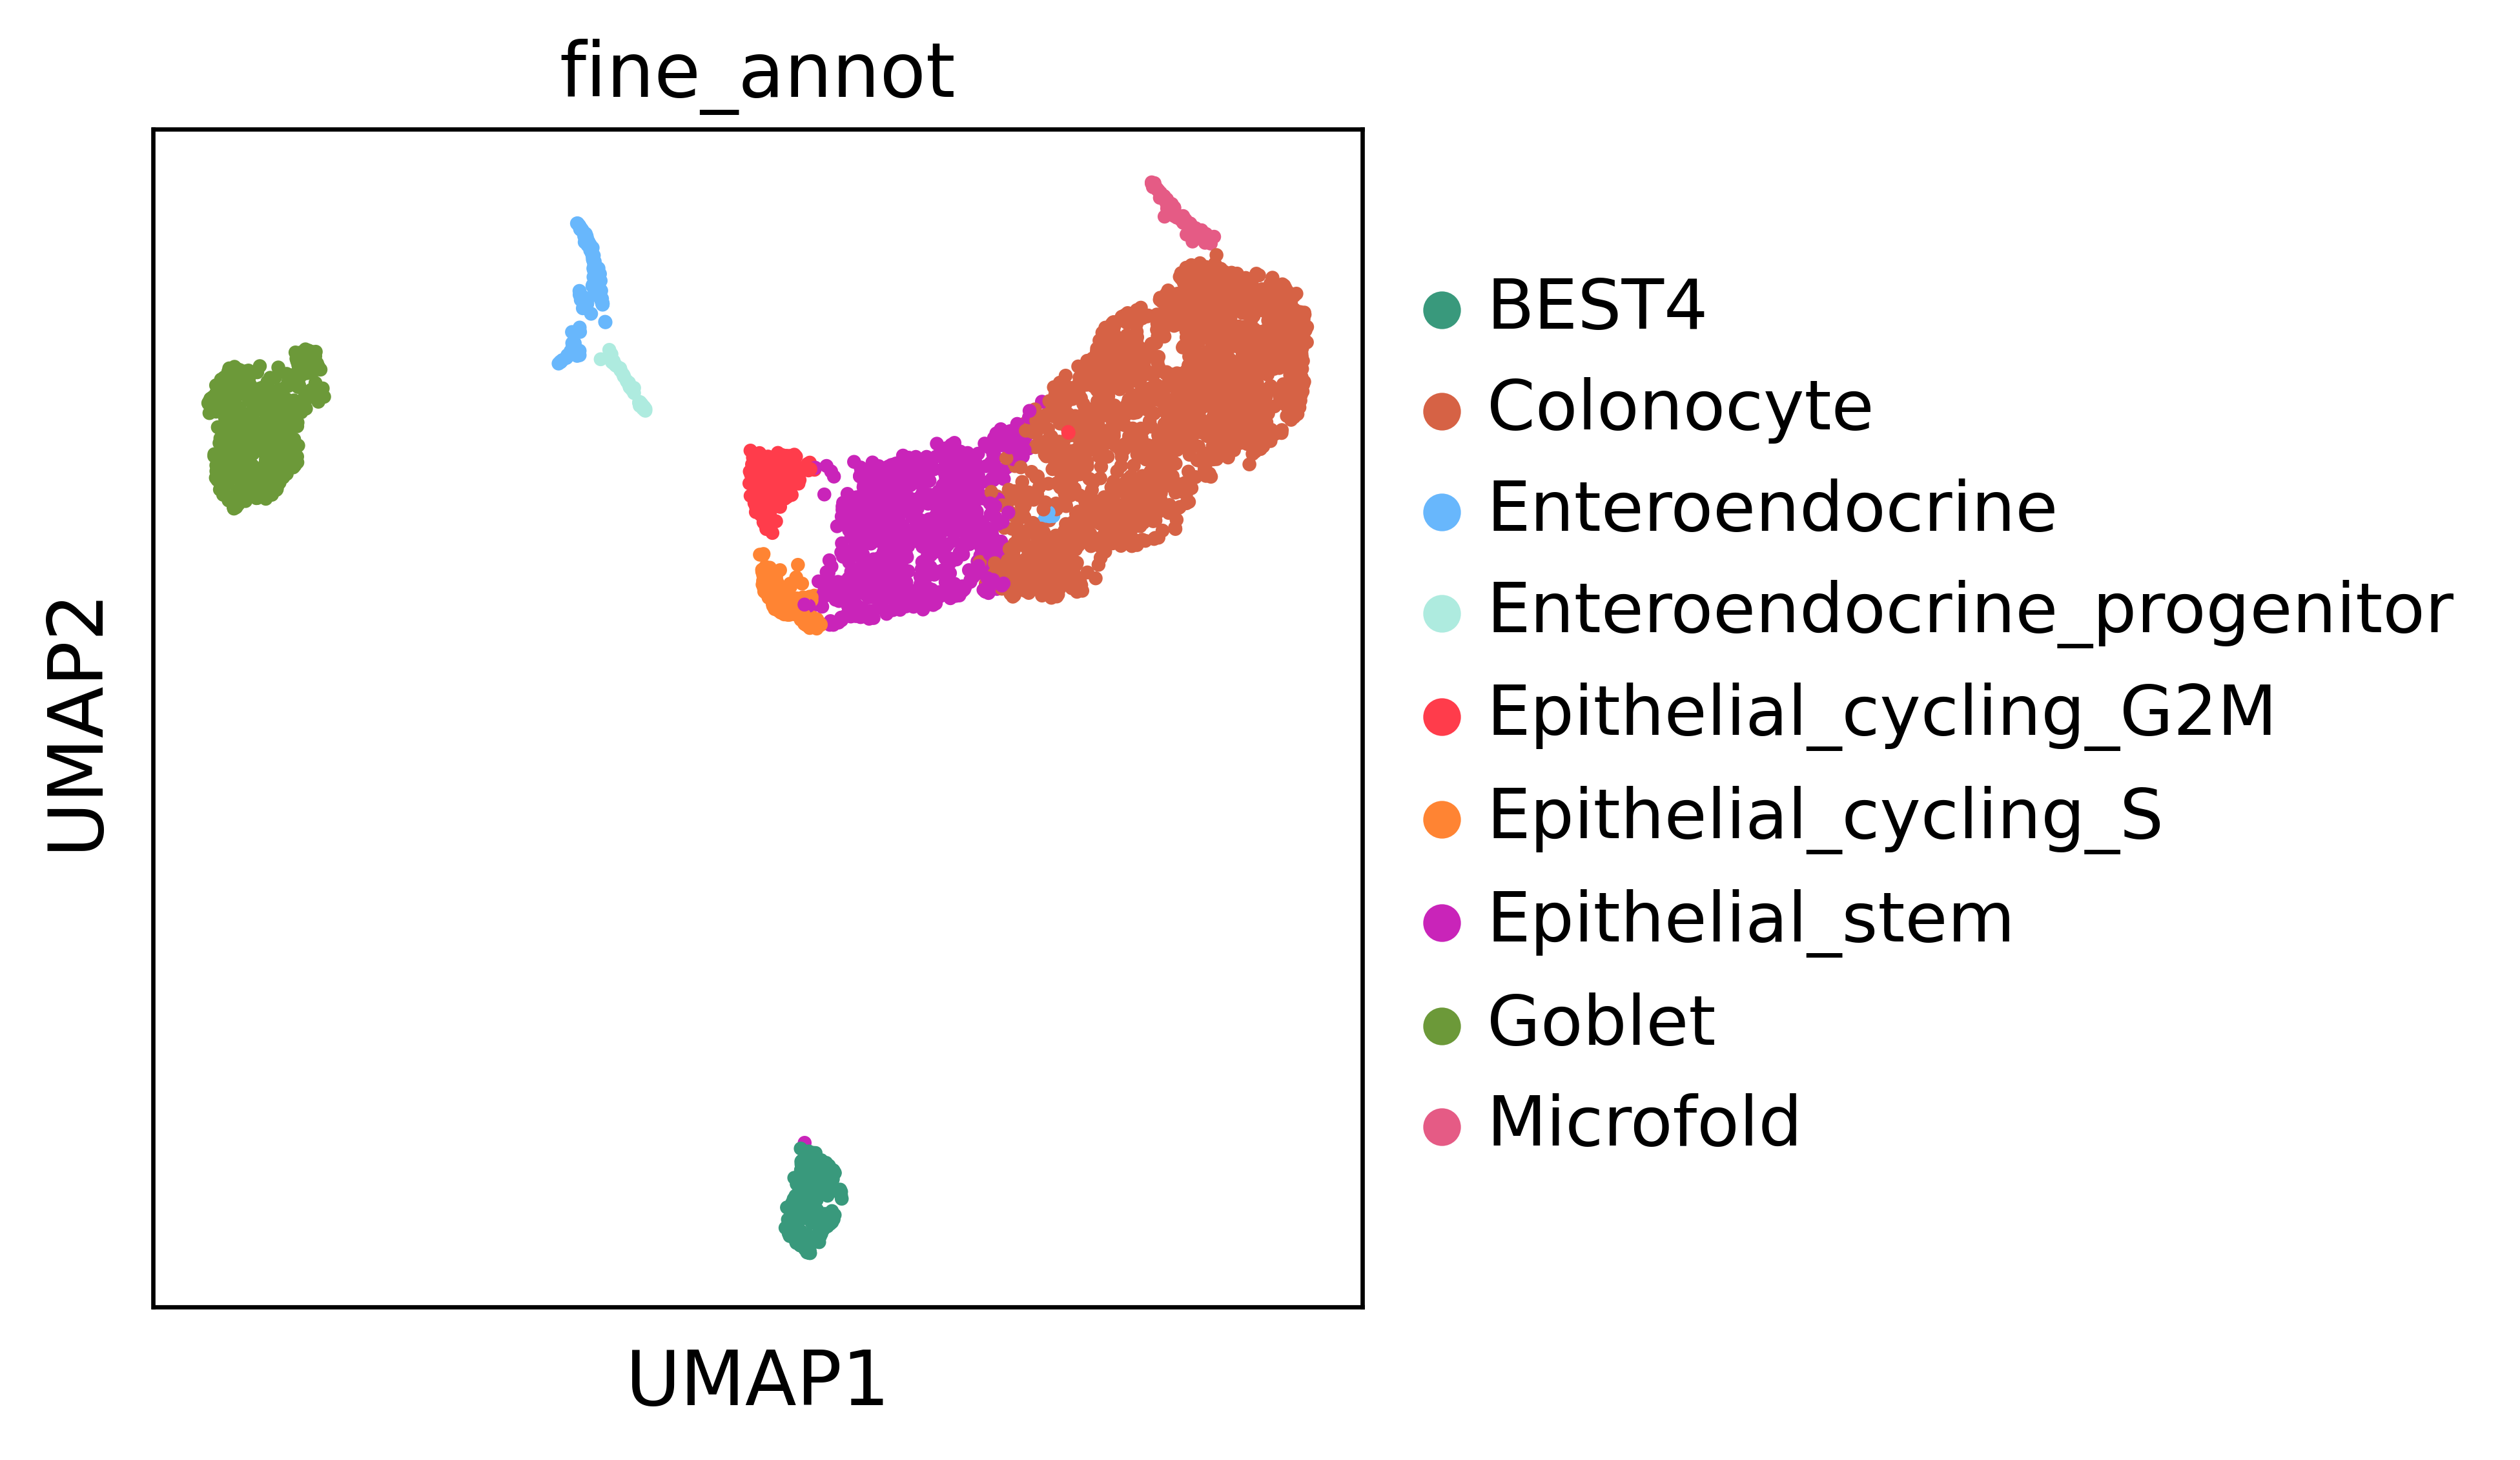

In [20]:
sc.pl.umap(adata,color='fine_annot',save='Epi_LI_ST_annot.png')

<AxesSubplot: title={'center': 'fine_annot'}, xlabel='UMAP1', ylabel='UMAP2'>

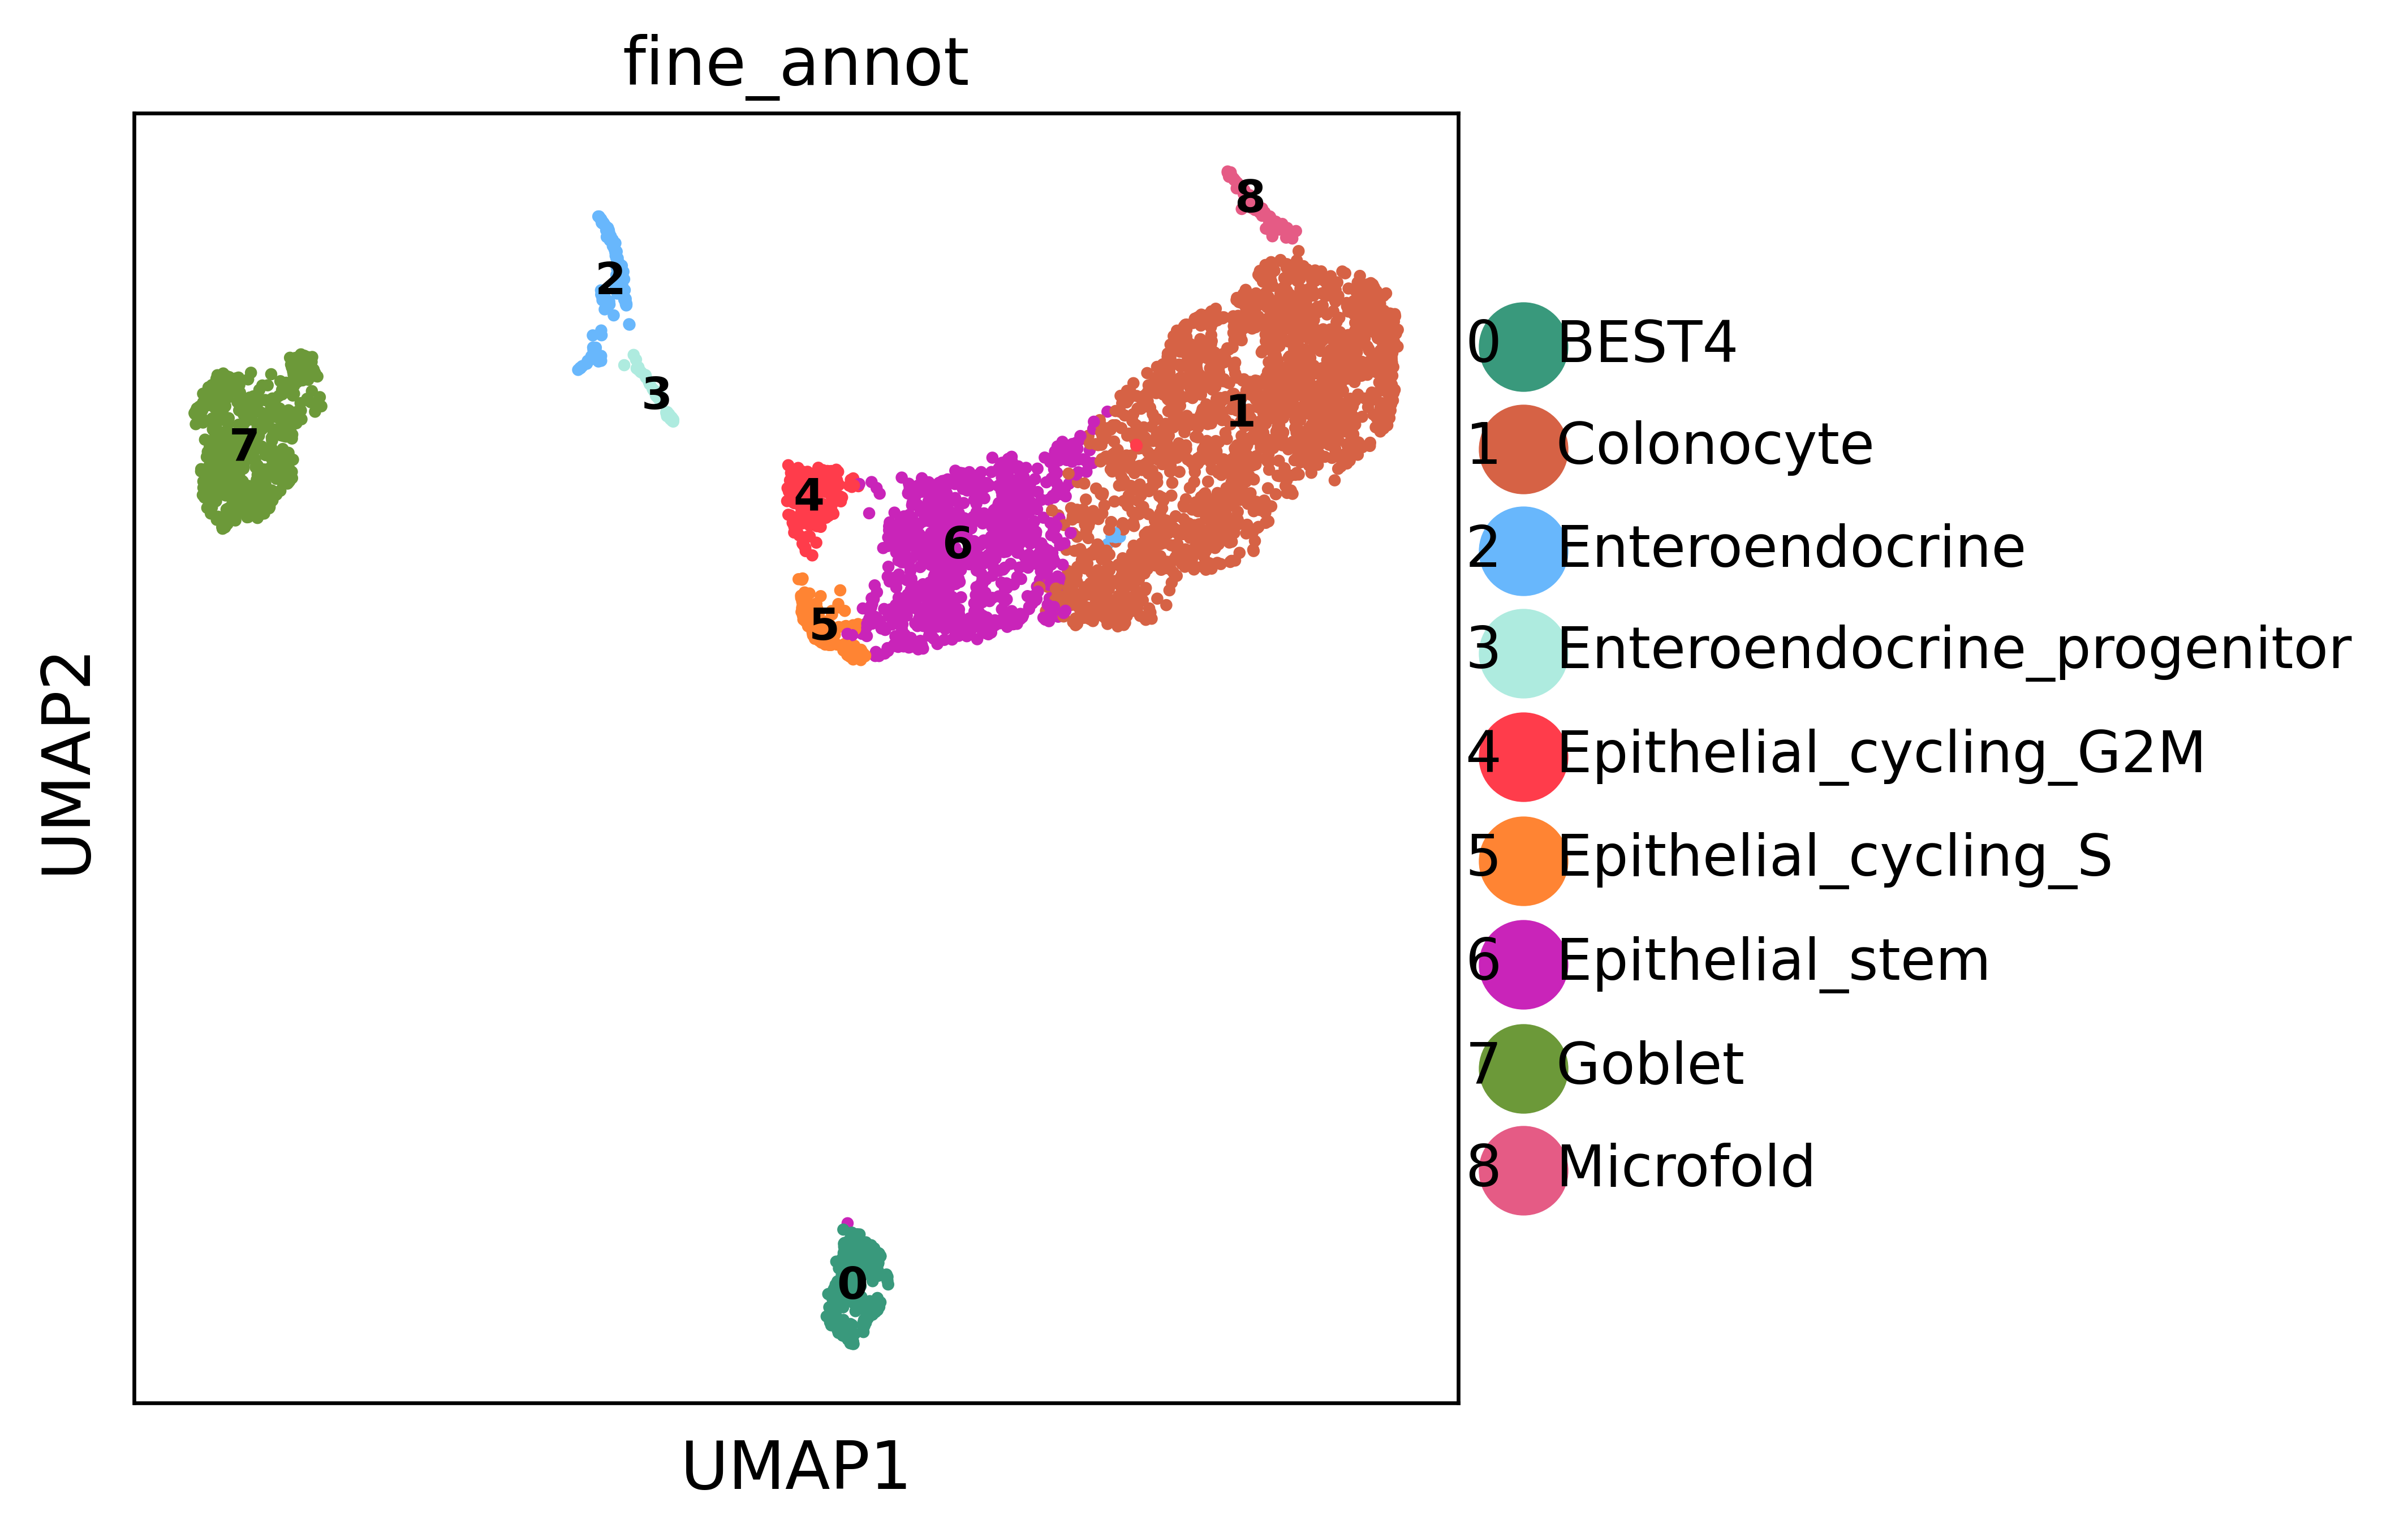

In [21]:
import sctk as sk
sk.plot_embedding(
    adata,
    basis="umap",
    groupby="fine_annot",
    figsize=(5, 5),
    save='figures/Epi_LI_ST_annot.png')